# Task 2.4 - Optimizing Hyperparameters - CNN Model

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
path = r'C:\Users\dmksk\OneDrive\Desktop\CF\Macine Learning with Python\Ex 2.4\Data'

In [5]:
# Load the CSV file with the correct column names
weather = pd.read_csv(os.path.join(path, 'Pleasant_Weather.csv'), header=0, index_col= False)

# Display the first few rows to confirm
weather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [6]:
# Load the CSV file with the correct column names
df = pd.read_csv(os.path.join(path, 'X_cleaned_withdate.csv'), header=0, index_col= False)

# Display the first few rows to confirm
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [7]:
# Filter pleasant dataset to 2010s
weather_2010s = weather[weather['DATE'].astype(str).str.startswith('201')] 
weather_2010s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0

In [8]:
# Check shape
weather_2010s.shape

(3652, 16)

In [9]:
# Filter weather dataset to 2010s
df_2010s = df[df['DATE'].astype(str).str.startswith('201')] 
df_2010s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                     0.0                0.7                 5.0   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
18263                   0.0              4.2              -1.6   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
18263             -6.3              0.7                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
18263                 0.89               0.9997                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
18263                      0.02                  0.0                  -1.1   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
18263                 -2.8                 -0.6                     2   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
18263               0.77             1.0056                       0.49   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
18263                     0.0                6.4                 1.6   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
18263               -0.5                5.0             0.93           0.9981   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
18263                     0.12                   0.2              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
18263              -2.6             -3.0             -1.8   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
18263                      8                0.97              0.9926   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
18263                        0.12                     0.46   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
18263                 0.0                  6.9                 5.5   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
18263                 7.7                       7                 0.91   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
18263               1.0008                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
18263                      0.01                  0.0                  -2.0   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
18263                 -6.1                 -1.1                   5   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
18263             0.82           1.0107         

In [10]:
df_2010s.shape

(3652, 137)

## 2. Data Wrangling

In [11]:
# Drop DATE column from answers

weather_2010s.drop(columns = 'DATE', inplace = True)

C:\Users\dmksk\AppData\Local\Temp\ipykernel_38896\757950693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2010s.drop(columns = 'DATE', inplace = True)


In [12]:
weather_2010s.shape

(3652, 15)

In [15]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_2010s = df_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2010s.shape

(3652, 135)

In [16]:
df_2010s.shape

(3652, 135)

### 3. Reshaping for Modeling

In [17]:
# Turn X and answers from a df to arrays

X = np.array(df_2010s)
y = np.array(weather_2010s)

In [18]:
X = X.reshape(-1,15,9)

In [19]:
X.shape

(3652, 15, 9)

In [20]:
# Use argmax to transform y

y =  np.argmax(y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y.shape

(3652,)

In [22]:
# Check y layout

from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

### 4. Data Split 

In [23]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 15, 9) (2739,)
(913, 15, 9) (913,)


### 5. Bayesian Hyperparameter Optimization

In [25]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15 # Number of weather stations
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [26]:
# Create function

def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate): 
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    #optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 #'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 #'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 #'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]  #optimizerD[optimizerL[round(optimizer)]]
    optimizer = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def cnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel,activation=activation, input_shape=(timesteps, input_dim)))
        #model.add(Conv1D(32, kernel_size=1,activation='relu', input_shape=(timesteps, input_dim)))
        
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation)) #(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax')) #sigmoid softmax
        #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        return model
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, params={'callbacks':[es]}).mean()
    return score

In [27]:
start = time.time()
params ={
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation':(0, 9), 
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size': (200, 1000), 
    'epochs':(20, 50),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=42)
nn_opt.maximize(init_points=15, n_iter=4) 
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3/3 - 5s - 2s/step - accuracy: 0.3788 - loss: 2.7288
Epoch 2/25
3/3 - 0s - 77ms/step - accuracy: 0.6390 - loss: 2.7060
Epoch 3/25
3/3 - 0s - 107ms/step - accuracy: 0.6390 - loss: 2.7048
Epoch 4/25
3/3 - 0s - 101ms/step - accuracy: 0.6390 - loss: 2.7038
Epoch 5/25
3/3 - 0s - 63ms/step - accuracy: 0.6390 - loss: 2.7028
Epoch 6/25
3/3 - 0s - 64ms/step - accuracy: 0.6390 - loss: 2.7020
Epoch 7/25
3/3 - 0s - 64ms/step - accuracy: 0.6390 - loss: 2.7012
Epoch 8/25
3/3 - 0s - 61ms/step - accuracy: 0.6390 - loss: 2.7004
Epoch 9/25
3/3 - 0s - 64ms/step - accuracy: 0.6390 - loss: 2.6997
Epoch 10/25
3/3 - 0s - 67ms/step - accuracy: 0.6390 - loss: 2.6990
Epoch 11/25
3/3 - 0s - 62ms/step - accuracy: 0.6390 - loss: 2.6984
Epoch 12/25
3/3 - 0s - 53ms/step - accuracy: 0.6390 - loss: 2.6977
Epoch 13/25
3/3 - 0s - 69ms/step - accuracy: 0.6390 - loss: 2.6971
Epoch 14/25
3/3 - 0s - 64ms/step - accuracy: 0.6390 - loss: 2.6965
Epoch 15/25
3/3 - 0s - 67ms/step - accuracy: 0.6390 - loss: 2.6959
Epoc

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3/3 - 5s - 2s/step - accuracy: 0.3939 - loss: 2.6957
Epoch 2/25
3/3 - 0s - 52ms/step - accuracy: 0.6385 - loss: 2.7060
Epoch 3/25
3/3 - 0s - 59ms/step - accuracy: 0.6385 - loss: 2.7048
Epoch 4/25
3/3 - 0s - 60ms/step - accuracy: 0.6385 - loss: 2.7038
Epoch 5/25
3/3 - 0s - 59ms/step - accuracy: 0.6385 - loss: 2.7028
Epoch 6/25
3/3 - 0s - 49ms/step - accuracy: 0.6385 - loss: 2.7020
Epoch 7/25
3/3 - 0s - 52ms/step - accuracy: 0.6385 - loss: 2.7012
Epoch 8/25
3/3 - 0s - 58ms/step - accuracy: 0.6385 - loss: 2.7004
Epoch 9/25
3/3 - 0s - 105ms/step - accuracy: 0.6385 - loss: 2.6997
Epoch 10/25
3/3 - 0s - 52ms/step - accuracy: 0.6385 - loss: 2.6990
Epoch 11/25
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: 2.6984
Epoch 12/25
3/3 - 0s - 55ms/step - accuracy: 0.6385 - loss: 2.6977
Epoch 13/25
3/3 - 0s - 62ms/step - accuracy: 0.6385 - loss: 2.6971
Epoch 14/25
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: 2.6965
Epoch 15/25
3/3 - 0s - 65ms/step - accuracy: 0.6385 - loss: 2.6959
Epoch

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3/3 - 5s - 2s/step - accuracy: 0.3861 - loss: 2.7258
Epoch 2/25
3/3 - 0s - 152ms/step - accuracy: 0.6385 - loss: 2.7060
Epoch 3/25
3/3 - 0s - 47ms/step - accuracy: 0.6385 - loss: 2.7048
Epoch 4/25
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: 2.7038
Epoch 5/25
3/3 - 0s - 61ms/step - accuracy: 0.6385 - loss: 2.7028
Epoch 6/25
3/3 - 0s - 53ms/step - accuracy: 0.6385 - loss: 2.7020
Epoch 7/25
3/3 - 0s - 59ms/step - accuracy: 0.6385 - loss: 2.7012
Epoch 8/25
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: 2.7004
Epoch 9/25
3/3 - 0s - 53ms/step - accuracy: 0.6385 - loss: 2.6997
Epoch 10/25
3/3 - 0s - 52ms/step - accuracy: 0.6385 - loss: 2.6990
Epoch 11/25
3/3 - 0s - 54ms/step - accuracy: 0.6385 - loss: 2.6984
Epoch 12/25
3/3 - 0s - 62ms/step - accuracy: 0.6385 - loss: 2.6977
Epoch 13/25
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: 2.6971
Epoch 14/25
3/3 - 0s - 45ms/step - accuracy: 0.6385 - loss: 2.6965
Epoch 15/25
3/3 - 0s - 52ms/step - accuracy: 0.6385 - loss: 2.6959
Epoch

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3/3 - 5s - 2s/step - accuracy: 0.4135 - loss: 2.6668
Epoch 2/25
3/3 - 0s - 59ms/step - accuracy: 0.6385 - loss: 2.7060
Epoch 3/25
3/3 - 0s - 56ms/step - accuracy: 0.6385 - loss: 2.7048
Epoch 4/25
3/3 - 0s - 107ms/step - accuracy: 0.6385 - loss: 2.7038
Epoch 5/25
3/3 - 0s - 58ms/step - accuracy: 0.6385 - loss: 2.7028
Epoch 6/25
3/3 - 0s - 57ms/step - accuracy: 0.6385 - loss: 2.7020
Epoch 7/25
3/3 - 0s - 51ms/step - accuracy: 0.6385 - loss: 2.7012
Epoch 8/25
3/3 - 0s - 67ms/step - accuracy: 0.6385 - loss: 2.7004
Epoch 9/25
3/3 - 0s - 116ms/step - accuracy: 0.6385 - loss: 2.6997
Epoch 10/25
3/3 - 0s - 62ms/step - accuracy: 0.6385 - loss: 2.6990
Epoch 11/25
3/3 - 0s - 57ms/step - accuracy: 0.6385 - loss: 2.6983
Epoch 12/25
3/3 - 0s - 60ms/step - accuracy: 0.6385 - loss: 2.6977
Epoch 13/25
3/3 - 0s - 59ms/step - accuracy: 0.6385 - loss: 2.6971
Epoch 14/25
3/3 - 0s - 61ms/step - accuracy: 0.6385 - loss: 2.6965
Epoch 15/25
3/3 - 0s - 64ms/step - accuracy: 0.6385 - loss: 2.6959
Epoc

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3/3 - 5s - 2s/step - accuracy: 0.3613 - loss: 2.7404
Epoch 2/25
3/3 - 0s - 50ms/step - accuracy: 0.6382 - loss: 2.7060
Epoch 3/25
3/3 - 0s - 52ms/step - accuracy: 0.6382 - loss: 2.7048
Epoch 4/25
3/3 - 0s - 43ms/step - accuracy: 0.6382 - loss: 2.7038
Epoch 5/25
3/3 - 0s - 63ms/step - accuracy: 0.6382 - loss: 2.7028
Epoch 6/25
3/3 - 0s - 55ms/step - accuracy: 0.6382 - loss: 2.7020
Epoch 7/25
3/3 - 0s - 64ms/step - accuracy: 0.6382 - loss: 2.7012
Epoch 8/25
3/3 - 0s - 52ms/step - accuracy: 0.6382 - loss: 2.7004
Epoch 9/25
3/3 - 0s - 48ms/step - accuracy: 0.6382 - loss: 2.6997
Epoch 10/25
3/3 - 0s - 48ms/step - accuracy: 0.6382 - loss: 2.6990
Epoch 11/25
3/3 - 0s - 53ms/step - accuracy: 0.6382 - loss: 2.6983
Epoch 12/25
3/3 - 0s - 56ms/step - accuracy: 0.6382 - loss: 2.6977
Epoch 13/25
3/3 - 0s - 53ms/step - accuracy: 0.6382 - loss: 2.6971
Epoch 14/25
3/3 - 0s - 108ms/step - accuracy: 0.6382 - loss: 2.6965
Epoch 15/25
3/3 - 0s - 52ms/step - accuracy: 0.6382 - loss: 2.6959
Epoch

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 4s - 637ms/step - accuracy: 0.6390 - loss: nan
Epoch 2/29
6/6 - 0s - 28ms/step - accuracy: 0.6390 - loss: nan
Epoch 3/29
6/6 - 0s - 17ms/step - accuracy: 0.6390 - loss: nan
Epoch 4/29
6/6 - 0s - 25ms/step - accuracy: 0.6390 - loss: nan
Epoch 5/29
6/6 - 0s - 29ms/step - accuracy: 0.6390 - loss: nan
Epoch 6/29
6/6 - 0s - 29ms/step - accuracy: 0.6390 - loss: nan
Epoch 7/29
6/6 - 0s - 26ms/step - accuracy: 0.6390 - loss: nan
Epoch 8/29
6/6 - 0s - 26ms/step - accuracy: 0.6390 - loss: nan
Epoch 9/29
6/6 - 0s - 28ms/step - accuracy: 0.6390 - loss: nan
Epoch 10/29
6/6 - 0s - 28ms/step - accuracy: 0.6390 - loss: nan
Epoch 11/29
6/6 - 0s - 20ms/step - accuracy: 0.6390 - loss: nan
Epoch 12/29
6/6 - 0s - 33ms/step - accuracy: 0.6390 - loss: nan
Epoch 13/29
6/6 - 0s - 48ms/step - accuracy: 0.6390 - loss: nan
Epoch 14/29
6/6 - 0s - 27ms/step - accuracy: 0.6390 - loss: nan
Epoch 15/29
6/6 - 0s - 25ms/step - accuracy: 0.6390 - loss: nan
Epoch 16/29
6/6 - 0s - 52ms/step - accuracy: 0.6390 - loss:

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/29
6/6 - 5s - 802ms/step - accuracy: 0.5331 - loss: nan
Epoch 2/29
6/6 - 0s - 24ms/step - accuracy: 0.6385 - loss: nan
Epoch 3/29
6/6 - 0s - 23ms/step - accuracy: 0.6385 - loss: nan
Epoch 4/29
6/6 - 0s - 29ms/step - accuracy: 0.6385 - loss: nan
Epoch 5/29
6/6 - 0s - 27ms/step - accuracy: 0.6385 - loss: nan
Epoch 6/29
6/6 - 0s - 24ms/step - accuracy: 0.6385 - loss: nan
Epoch 7/29
6/6 - 0s - 21ms/step - accuracy: 0.6385 - loss: nan
Epoch 8/29
6/6 - 0s - 33ms/step - accuracy: 0.6385 - loss: nan
Epoch 9/29
6/6 - 0s - 25ms/step - accuracy: 0.6385 - loss: nan
Epoch 10/29
6/6 - 0s - 32ms/step - accuracy: 0.6385 - loss: nan
Epoch 11/29
6/6 - 0s - 29ms/step - accuracy: 0.6385 - loss: nan
Epoch 12/29
6/6 - 0s - 26ms/step - accuracy: 0.6385 - loss: nan
Epoch 13/29
6/6 - 0s - 16ms/step - accuracy: 0.6385 - loss: nan
Epoch 14/29
6/6 - 0s - 21ms/step - accuracy: 0.6385 - loss: nan
Epoch 15/29
6/6 - 0s - 23ms/step - accuracy: 0.6385 - loss: nan
Epoch 16/29
6/6 - 0s - 20ms/step - accuracy: 0.6

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/29
6/6 - 4s - 643ms/step - accuracy: 0.6385 - loss: nan
Epoch 2/29
6/6 - 0s - 27ms/step - accuracy: 0.6385 - loss: nan
Epoch 3/29
6/6 - 0s - 28ms/step - accuracy: 0.6385 - loss: nan
Epoch 4/29
6/6 - 0s - 27ms/step - accuracy: 0.6385 - loss: nan
Epoch 5/29
6/6 - 0s - 26ms/step - accuracy: 0.6385 - loss: nan
Epoch 6/29
6/6 - 0s - 28ms/step - accuracy: 0.6385 - loss: nan
Epoch 7/29
6/6 - 0s - 55ms/step - accuracy: 0.6385 - loss: nan
Epoch 8/29
6/6 - 0s - 23ms/step - accuracy: 0.6385 - loss: nan
Epoch 9/29
6/6 - 0s - 26ms/step - accuracy: 0.6385 - loss: nan
Epoch 10/29
6/6 - 0s - 30ms/step - accuracy: 0.6385 - loss: nan
Epoch 11/29
6/6 - 0s - 18ms/step - accuracy: 0.6385 - loss: nan
Epoch 12/29
6/6 - 0s - 23ms/step - accuracy: 0.6385 - loss: nan
Epoch 13/29
6/6 - 0s - 27ms/step - accuracy: 0.6385 - loss: nan
Epoch 14/29
6/6 - 0s - 22ms/step - accuracy: 0.6385 - loss: nan
Epoch 15/29
6/6 - 0s - 30ms/step - accuracy: 0.6385 - loss: nan
Epoch 16/29
6/6 - 0s - 25ms/step - accuracy: 0.6

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/29
6/6 - 4s - 727ms/step - accuracy: 0.5313 - loss: nan
Epoch 2/29
6/6 - 0s - 32ms/step - accuracy: 0.6385 - loss: nan
Epoch 3/29
6/6 - 0s - 27ms/step - accuracy: 0.6385 - loss: nan
Epoch 4/29
6/6 - 0s - 26ms/step - accuracy: 0.6385 - loss: nan
Epoch 5/29
6/6 - 0s - 50ms/step - accuracy: 0.6385 - loss: nan
Epoch 6/29
6/6 - 0s - 22ms/step - accuracy: 0.6385 - loss: nan
Epoch 7/29
6/6 - 0s - 21ms/step - accuracy: 0.6385 - loss: nan
Epoch 8/29
6/6 - 0s - 30ms/step - accuracy: 0.6385 - loss: nan
Epoch 9/29
6/6 - 0s - 29ms/step - accuracy: 0.6385 - loss: nan
Epoch 10/29
6/6 - 0s - 24ms/step - accuracy: 0.6385 - loss: nan
Epoch 11/29
6/6 - 0s - 25ms/step - accuracy: 0.6385 - loss: nan
Epoch 12/29
6/6 - 0s - 13ms/step - accuracy: 0.6385 - loss: nan
Epoch 13/29
6/6 - 0s - 39ms/step - accuracy: 0.6385 - loss: nan
Epoch 14/29
6/6 - 0s - 27ms/step - accuracy: 0.6385 - loss: nan
Epoch 15/29
6/6 - 0s - 26ms/step - accuracy: 0.6385 - loss: nan
Epoch 16/29
6/6 - 0s - 27ms/step - accuracy: 0.6

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 4s - 669ms/step - accuracy: 0.6382 - loss: nan
Epoch 2/29
6/6 - 0s - 23ms/step - accuracy: 0.6382 - loss: nan
Epoch 3/29
6/6 - 0s - 20ms/step - accuracy: 0.6382 - loss: nan
Epoch 4/29
6/6 - 0s - 36ms/step - accuracy: 0.6382 - loss: nan
Epoch 5/29
6/6 - 0s - 20ms/step - accuracy: 0.6382 - loss: nan
Epoch 6/29
6/6 - 0s - 34ms/step - accuracy: 0.6382 - loss: nan
Epoch 7/29
6/6 - 0s - 24ms/step - accuracy: 0.6382 - loss: nan
Epoch 8/29
6/6 - 0s - 28ms/step - accuracy: 0.6382 - loss: nan
Epoch 9/29
6/6 - 0s - 20ms/step - accuracy: 0.6382 - loss: nan
Epoch 10/29
6/6 - 0s - 28ms/step - accuracy: 0.6382 - loss: nan
Epoch 11/29
6/6 - 0s - 26ms/step - accuracy: 0.6382 - loss: nan
Epoch 12/29
6/6 - 0s - 31ms/step - accuracy: 0.6382 - loss: nan
Epoch 13/29
6/6 - 0s - 53ms/step - accuracy: 0.6382 - loss: nan
Epoch 14/29
6/6 - 0s - 29ms/step - accuracy: 0.6382 - loss: nan
Epoch 15/29
6/6 - 0s - 25ms/step - accuracy: 0.6382 - loss: nan
Epoch 16/29
6/6 - 0s - 22ms/step - accuracy: 0.6382 - loss:

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/38
3/3 - 6s - 2s/step - accuracy: 0.3450 - loss: 2.1908
Epoch 2/38
3/3 - 0s - 68ms/step - accuracy: 0.6340 - loss: 1.3483
Epoch 3/38
3/3 - 0s - 71ms/step - accuracy: 0.6413 - loss: 1.1274
Epoch 4/38
3/3 - 0s - 66ms/step - accuracy: 0.6586 - loss: 1.0414
Epoch 5/38
3/3 - 0s - 78ms/step - accuracy: 0.6641 - loss: 0.9907
Epoch 6/38
3/3 - 0s - 67ms/step - accuracy: 0.6632 - loss: 0.9549
Epoch 7/38
3/3 - 0s - 113ms/step - accuracy: 0.6778 - loss: 0.9246
Epoch 8/38
3/3 - 0s - 52ms/step - accuracy: 0.6851 - loss: 0.9006
Epoch 9/38
3/3 - 0s - 66ms/step - accuracy: 0.6883 - loss: 0.8818
Epoch 10/38
3/3 - 0s - 73ms/step - accuracy: 0.7029 - loss: 0.8611
Epoch 11/38
3/3 - 0s - 67ms/step - accuracy: 0.7129 - loss: 0.8425
Epoch 12/38
3/3 - 0s - 65ms/step - accuracy: 0.7175 - loss: 0.8243
Epoch 13/38
3/3 - 0s - 53ms/step - accuracy: 0.7234 - loss: 0.8078
Epoch 14/38
3/3 - 0s - 66ms/step - accuracy: 0.7303 - loss: 0.7929
Epoch 15/38
3/3 - 0s - 71ms/step - accuracy: 0.7325 - loss: 0.7778
Epoch

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/38
3/3 - 6s - 2s/step - accuracy: 0.3980 - loss: 2.1448
Epoch 2/38
3/3 - 0s - 70ms/step - accuracy: 0.6248 - loss: 1.3528
Epoch 3/38
3/3 - 0s - 65ms/step - accuracy: 0.6184 - loss: 1.1485
Epoch 4/38
3/3 - 0s - 67ms/step - accuracy: 0.6481 - loss: 1.0543
Epoch 5/38
3/3 - 0s - 62ms/step - accuracy: 0.6577 - loss: 1.0038
Epoch 6/38
3/3 - 0s - 66ms/step - accuracy: 0.6554 - loss: 0.9717
Epoch 7/38
3/3 - 0s - 49ms/step - accuracy: 0.6778 - loss: 0.9380
Epoch 8/38
3/3 - 0s - 73ms/step - accuracy: 0.6846 - loss: 0.9129
Epoch 9/38
3/3 - 0s - 70ms/step - accuracy: 0.6878 - loss: 0.8876
Epoch 10/38
3/3 - 0s - 68ms/step - accuracy: 0.7042 - loss: 0.8659
Epoch 11/38
3/3 - 0s - 50ms/step - accuracy: 0.7070 - loss: 0.8453
Epoch 12/38
3/3 - 0s - 56ms/step - accuracy: 0.7065 - loss: 0.8336
Epoch 13/38
3/3 - 0s - 55ms/step - accuracy: 0.7179 - loss: 0.8079
Epoch 14/38
3/3 - 0s - 75ms/step - accuracy: 0.7280 - loss: 0.7977
Epoch 15/38
3/3 - 0s - 60ms/step - accuracy: 0.7293 - loss: 0.7766
Epoch 

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 6s - 2s/step - accuracy: 0.4801 - loss: 2.0248
Epoch 2/38
3/3 - 0s - 52ms/step - accuracy: 0.6381 - loss: 1.2973
Epoch 3/38
3/3 - 0s - 70ms/step - accuracy: 0.6212 - loss: 1.1292
Epoch 4/38
3/3 - 0s - 71ms/step - accuracy: 0.6481 - loss: 1.0456
Epoch 5/38
3/3 - 0s - 54ms/step - accuracy: 0.6691 - loss: 0.9948
Epoch 6/38
3/3 - 0s - 52ms/step - accuracy: 0.6823 - loss: 0.9586
Epoch 7/38
3/3 - 0s - 53ms/step - accuracy: 0.6828 - loss: 0.9277
Epoch 8/38
3/3 - 0s - 50ms/step - accuracy: 0.6919 - loss: 0.9016
Epoch 9/38
3/3 - 0s - 58ms/step - accuracy: 0.7006 - loss: 0.8774
Epoch 10/38
3/3 - 0s - 53ms/step - accuracy: 0.7147 - loss: 0.8522
Epoch 11/38
3/3 - 0s - 61ms/step - accuracy: 0.7188 - loss: 0.8323
Epoch 12/38
3/3 - 0s - 62ms/step - accuracy: 0.7225 - loss: 0.8131
Epoch 13/38
3/3 - 0s - 61ms/step - accuracy: 0.7335 - loss: 0.7950
Epoch 14/38
3/3 - 0s - 66ms/step - accuracy: 0.7408 - loss: 0.7812
Epoch 15/38
3/3 - 0s - 66ms/step - accuracy: 0.7449 - loss: 0.7686
Epoch 16/38
3/3 -

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 6s - 2s/step - accuracy: 0.3615 - loss: 2.3103
Epoch 2/38
3/3 - 0s - 69ms/step - accuracy: 0.6344 - loss: 1.3807
Epoch 3/38
3/3 - 0s - 63ms/step - accuracy: 0.6303 - loss: 1.1302
Epoch 4/38
3/3 - 0s - 123ms/step - accuracy: 0.6481 - loss: 1.0423
Epoch 5/38
3/3 - 0s - 66ms/step - accuracy: 0.6627 - loss: 0.9908
Epoch 6/38
3/3 - 0s - 68ms/step - accuracy: 0.6741 - loss: 0.9537
Epoch 7/38
3/3 - 0s - 63ms/step - accuracy: 0.6878 - loss: 0.9237
Epoch 8/38
3/3 - 0s - 65ms/step - accuracy: 0.6933 - loss: 0.9010
Epoch 9/38
3/3 - 0s - 64ms/step - accuracy: 0.6956 - loss: 0.8779
Epoch 10/38
3/3 - 0s - 69ms/step - accuracy: 0.7029 - loss: 0.8650
Epoch 11/38
3/3 - 0s - 119ms/step - accuracy: 0.7166 - loss: 0.8425
Epoch 12/38
3/3 - 0s - 56ms/step - accuracy: 0.7211 - loss: 0.8263
Epoch 13/38
3/3 - 0s - 67ms/step - accuracy: 0.7157 - loss: 0.8115
Epoch 14/38
3/3 - 0s - 63ms/step - accuracy: 0.7207 - loss: 0.8007
Epoch 15/38
3/3 - 0s - 65ms/step - accuracy: 0.7335 - loss: 0.7804
Epoch 16/38
3/3

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/38
3/3 - 7s - 2s/step - accuracy: 0.2801 - loss: 2.3462
Epoch 2/38
3/3 - 0s - 123ms/step - accuracy: 0.6241 - loss: 1.4542
Epoch 3/38
3/3 - 0s - 63ms/step - accuracy: 0.6328 - loss: 1.1761
Epoch 4/38
3/3 - 0s - 64ms/step - accuracy: 0.6387 - loss: 1.0715
Epoch 5/38
3/3 - 0s - 69ms/step - accuracy: 0.6496 - loss: 1.0150
Epoch 6/38
3/3 - 0s - 117ms/step - accuracy: 0.6629 - loss: 0.9751
Epoch 7/38
3/3 - 0s - 64ms/step - accuracy: 0.6724 - loss: 0.9468
Epoch 8/38
3/3 - 0s - 70ms/step - accuracy: 0.6825 - loss: 0.9173
Epoch 9/38
3/3 - 0s - 62ms/step - accuracy: 0.6984 - loss: 0.8928
Epoch 10/38
3/3 - 0s - 55ms/step - accuracy: 0.7094 - loss: 0.8725
Epoch 11/38
3/3 - 0s - 68ms/step - accuracy: 0.7089 - loss: 0.8522
Epoch 12/38
3/3 - 0s - 65ms/step - accuracy: 0.7199 - loss: 0.8325
Epoch 13/38
3/3 - 0s - 61ms/step - accuracy: 0.7299 - loss: 0.8149
Epoch 14/38
3/3 - 0s - 67ms/step - accuracy: 0.7331 - loss: 0.7986
Epoch 15/38
3/3 - 0s - 62ms/step - accuracy: 0.7395 - loss: 0.7826
Epoc

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/24
8/8 - 3s - 385ms/step - accuracy: 0.0110 - loss: 2.7224
Epoch 2/24
8/8 - 0s - 24ms/step - accuracy: 0.1159 - loss: 2.5739
Epoch 3/24
8/8 - 0s - 35ms/step - accuracy: 0.4518 - loss: 2.4424
Epoch 4/24
8/8 - 0s - 37ms/step - accuracy: 0.6011 - loss: 2.3252
Epoch 5/24
8/8 - 0s - 39ms/step - accuracy: 0.6330 - loss: 2.2180
Epoch 6/24
8/8 - 0s - 55ms/step - accuracy: 0.6376 - loss: 2.1179
Epoch 7/24
8/8 - 0s - 45ms/step - accuracy: 0.6390 - loss: 2.0277
Epoch 8/24
8/8 - 0s - 39ms/step - accuracy: 0.6390 - loss: 1.9502
Epoch 9/24
8/8 - 0s - 38ms/step - accuracy: 0.6390 - loss: 1.8716
Epoch 10/24
8/8 - 0s - 25ms/step - accuracy: 0.6390 - loss: 1.8075
Epoch 11/24
8/8 - 0s - 37ms/step - accuracy: 0.6390 - loss: 1.7487
Epoch 12/24
8/8 - 0s - 33ms/step - accuracy: 0.6390 - loss: 1.6950
Epoch 13/24
8/8 - 0s - 42ms/step - accuracy: 0.6390 - loss: 1.6494
Epoch 14/24
8/8 - 0s - 45ms/step - accuracy: 0.6385 - loss: 1.6087
Epoch 15/24
8/8 - 0s - 32ms/step - accuracy: 0.6390 - loss: 1.5708
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 - 3s - 334ms/step - accuracy: 4.5641e-04 - loss: 2.8664
Epoch 2/24
8/8 - 0s - 30ms/step - accuracy: 0.0434 - loss: 2.7064
Epoch 3/24
8/8 - 0s - 32ms/step - accuracy: 0.3820 - loss: 2.5714
Epoch 4/24
8/8 - 0s - 47ms/step - accuracy: 0.5532 - loss: 2.4521
Epoch 5/24
8/8 - 0s - 28ms/step - accuracy: 0.5993 - loss: 2.3455
Epoch 6/24
8/8 - 0s - 37ms/step - accuracy: 0.6143 - loss: 2.2489
Epoch 7/24
8/8 - 0s - 40ms/step - accuracy: 0.6221 - loss: 2.1634
Epoch 8/24
8/8 - 0s - 32ms/step - accuracy: 0.6262 - loss: 2.0845
Epoch 9/24
8/8 - 0s - 28ms/step - accuracy: 0.6294 - loss: 2.0160
Epoch 10/24
8/8 - 0s - 31ms/step - accuracy: 0.6312 - loss: 1.9501
Epoch 11/24
8/8 - 0s - 36ms/step - accuracy: 0.6317 - loss: 1.8935
Epoch 12/24
8/8 - 0s - 43ms/step - accuracy: 0.6312 - loss: 1.8416
Epoch 13/24
8/8 - 0s - 41ms/step - accuracy: 0.6326 - loss: 1.7947
Epoch 14/24
8/8 - 0s - 38ms/step - accuracy: 0.6335 - loss: 1.7511
Epoch 15/24
8/8 - 0s - 45ms/step - accuracy: 0.6326 - loss: 1.7125
Epoch 16/2

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/24
8/8 - 4s - 445ms/step - accuracy: 0.0393 - loss: 2.7871
Epoch 2/24
8/8 - 0s - 36ms/step - accuracy: 0.1209 - loss: 2.6406
Epoch 3/24
8/8 - 0s - 41ms/step - accuracy: 0.3359 - loss: 2.5141
Epoch 4/24
8/8 - 0s - 46ms/step - accuracy: 0.5098 - loss: 2.4056
Epoch 5/24
8/8 - 0s - 40ms/step - accuracy: 0.6107 - loss: 2.3038
Epoch 6/24
8/8 - 0s - 46ms/step - accuracy: 0.6280 - loss: 2.2098
Epoch 7/24
8/8 - 0s - 32ms/step - accuracy: 0.6312 - loss: 2.1263
Epoch 8/24
8/8 - 0s - 42ms/step - accuracy: 0.6340 - loss: 2.0477
Epoch 9/24
8/8 - 0s - 44ms/step - accuracy: 0.6340 - loss: 1.9740
Epoch 10/24
8/8 - 0s - 48ms/step - accuracy: 0.6349 - loss: 1.9064
Epoch 11/24
8/8 - 0s - 31ms/step - accuracy: 0.6344 - loss: 1.8454
Epoch 12/24
8/8 - 0s - 34ms/step - accuracy: 0.6344 - loss: 1.7894
Epoch 13/24
8/8 - 0s - 42ms/step - accuracy: 0.6344 - loss: 1.7371
Epoch 14/24
8/8 - 0s - 46ms/step - accuracy: 0.6353 - loss: 1.6869
Epoch 15/24
8/8 - 0s - 35ms/step - accuracy: 0.6349 - loss: 1.6477
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/24
8/8 - 3s - 343ms/step - accuracy: 0.0675 - loss: 2.5683
Epoch 2/24
8/8 - 1s - 81ms/step - accuracy: 0.3031 - loss: 2.4404
Epoch 3/24
8/8 - 0s - 37ms/step - accuracy: 0.4966 - loss: 2.3288
Epoch 4/24
8/8 - 0s - 35ms/step - accuracy: 0.5783 - loss: 2.2289
Epoch 5/24
8/8 - 0s - 45ms/step - accuracy: 0.6029 - loss: 2.1401
Epoch 6/24
8/8 - 0s - 31ms/step - accuracy: 0.6207 - loss: 2.0583
Epoch 7/24
8/8 - 0s - 47ms/step - accuracy: 0.6267 - loss: 1.9818
Epoch 8/24
8/8 - 0s - 39ms/step - accuracy: 0.6317 - loss: 1.9084
Epoch 9/24
8/8 - 0s - 41ms/step - accuracy: 0.6330 - loss: 1.8459
Epoch 10/24
8/8 - 0s - 43ms/step - accuracy: 0.6349 - loss: 1.7869
Epoch 11/24
8/8 - 0s - 31ms/step - accuracy: 0.6340 - loss: 1.7317
Epoch 12/24
8/8 - 0s - 32ms/step - accuracy: 0.6353 - loss: 1.6857
Epoch 13/24
8/8 - 0s - 32ms/step - accuracy: 0.6349 - loss: 1.6399
Epoch 14/24
8/8 - 0s - 46ms/step - accuracy: 0.6349 - loss: 1.6003
Epoch 15/24
8/8 - 0s - 42ms/step - accuracy: 0.6358 - loss: 1.5661
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1061

8/8 - 3s - 342ms/step - accuracy: 0.0370 - loss: 2.6215
Epoch 2/24
8/8 - 0s - 23ms/step - accuracy: 0.3093 - loss: 2.4931
Epoch 3/24
8/8 - 0s - 34ms/step - accuracy: 0.5557 - loss: 2.3815
Epoch 4/24
8/8 - 0s - 39ms/step - accuracy: 0.6136 - loss: 2.2804
Epoch 5/24
8/8 - 0s - 40ms/step - accuracy: 0.6305 - loss: 2.1877
Epoch 6/24
8/8 - 0s - 40ms/step - accuracy: 0.6337 - loss: 2.1042
Epoch 7/24
8/8 - 0s - 38ms/step - accuracy: 0.6350 - loss: 2.0259
Epoch 8/24
8/8 - 0s - 41ms/step - accuracy: 0.6364 - loss: 1.9534
Epoch 9/24
8/8 - 0s - 52ms/step - accuracy: 0.6364 - loss: 1.8866
Epoch 10/24
8/8 - 0s - 32ms/step - accuracy: 0.6369 - loss: 1.8286
Epoch 11/24
8/8 - 0s - 27ms/step - accuracy: 0.6364 - loss: 1.7734
Epoch 12/24
8/8 - 0s - 31ms/step - accuracy: 0.6373 - loss: 1.7248
Epoch 13/24
8/8 - 0s - 37ms/step - accuracy: 0.6378 - loss: 1.6812
Epoch 14/24
8/8 - 0s - 38ms/step - accuracy: 0.6373 - loss: 1.6403
Epoch 15/24
8/8 - 0s - 31ms/step - accuracy: 0.6378 - loss: 1.6066
Epoch 16/24
8/

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
7/7 - 4s - 566ms/step - accuracy: 0.5317 - loss: 2.1695
Epoch 2/48
7/7 - 0s - 50ms/step - accuracy: 0.5974 - loss: 1.2754
Epoch 3/48
7/7 - 0s - 43ms/step - accuracy: 0.6171 - loss: 1.1542
Epoch 4/48
7/7 - 0s - 30ms/step - accuracy: 0.6413 - loss: 1.0795
Epoch 5/48
7/7 - 0s - 49ms/step - accuracy: 0.6285 - loss: 1.0780
Epoch 6/48
7/7 - 0s - 29ms/step - accuracy: 0.6527 - loss: 1.0044
Epoch 7/48
7/7 - 0s - 43ms/step - accuracy: 0.6426 - loss: 1.0047
Epoch 8/48
7/7 - 0s - 52ms/step - accuracy: 0.6613 - loss: 0.9585
Epoch 9/48
7/7 - 0s - 53ms/step - accuracy: 0.6773 - loss: 0.9225
Epoch 10/48
7/7 - 0s - 29ms/step - accuracy: 0.6563 - loss: 0.9607
Epoch 11/48
7/7 - 0s - 49ms/step - accuracy: 0.6810 - loss: 0.8776
Epoch 12/48
7/7 - 0s - 22ms/step - accuracy: 0.6874 - loss: 0.8802
Epoch 13/48
7/7 - 0s - 29ms/step - accuracy: 0.6814 - loss: 0.8971
Epoch 14/48
7/7 - 0s - 30ms/step - accuracy: 0.7134 - loss: 0.8301
Epoch 15/48
7/7 - 0s - 49ms/step - accuracy: 0.7115 - loss: 0.8440
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
7/7 - 3s - 462ms/step - accuracy: 0.2958 - loss: 3.1341
Epoch 2/48
7/7 - 0s - 25ms/step - accuracy: 0.6025 - loss: 1.3265
Epoch 3/48
7/7 - 0s - 25ms/step - accuracy: 0.6070 - loss: 1.2084
Epoch 4/48
7/7 - 0s - 28ms/step - accuracy: 0.6225 - loss: 1.1385
Epoch 5/48
7/7 - 0s - 45ms/step - accuracy: 0.6171 - loss: 1.1292
Epoch 6/48
7/7 - 0s - 50ms/step - accuracy: 0.6372 - loss: 1.0634
Epoch 7/48
7/7 - 0s - 50ms/step - accuracy: 0.6298 - loss: 1.0708
Epoch 8/48
7/7 - 0s - 48ms/step - accuracy: 0.6454 - loss: 1.0279
Epoch 9/48
7/7 - 0s - 49ms/step - accuracy: 0.6376 - loss: 1.0433
Epoch 10/48
7/7 - 0s - 25ms/step - accuracy: 0.6568 - loss: 1.0042
Epoch 11/48
7/7 - 0s - 53ms/step - accuracy: 0.6673 - loss: 0.9637
Epoch 12/48
7/7 - 0s - 31ms/step - accuracy: 0.6659 - loss: 0.9658
Epoch 13/48
7/7 - 0s - 23ms/step - accuracy: 0.6801 - loss: 0.9438
Epoch 14/48
7/7 - 0s - 23ms/step - accuracy: 0.6869 - loss: 0.9212
Epoch 15/48
7/7 - 0s - 56ms/step - accuracy: 0.6732 - loss: 0.9256
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
7/7 - 3s - 471ms/step - accuracy: 0.3975 - loss: 2.4053
Epoch 2/48
7/7 - 0s - 15ms/step - accuracy: 0.5888 - loss: 1.2973
Epoch 3/48
7/7 - 0s - 27ms/step - accuracy: 0.6089 - loss: 1.1885
Epoch 4/48
7/7 - 0s - 39ms/step - accuracy: 0.6198 - loss: 1.1520
Epoch 5/48
7/7 - 0s - 31ms/step - accuracy: 0.6385 - loss: 1.0585
Epoch 6/48
7/7 - 0s - 44ms/step - accuracy: 0.6358 - loss: 1.0957
Epoch 7/48
7/7 - 0s - 58ms/step - accuracy: 0.6659 - loss: 0.9884
Epoch 8/48
7/7 - 0s - 37ms/step - accuracy: 0.6609 - loss: 0.9972
Epoch 9/48
7/7 - 0s - 31ms/step - accuracy: 0.6750 - loss: 0.9525
Epoch 10/48
7/7 - 0s - 50ms/step - accuracy: 0.6942 - loss: 0.9478
Epoch 11/48
7/7 - 0s - 48ms/step - accuracy: 0.6842 - loss: 0.9266
Epoch 12/48
7/7 - 0s - 28ms/step - accuracy: 0.6869 - loss: 0.9190
Epoch 13/48
7/7 - 0s - 45ms/step - accuracy: 0.6837 - loss: 0.9186
Epoch 14/48
7/7 - 0s - 55ms/step - accuracy: 0.6869 - loss: 0.8980
Epoch 15/48
7/7 - 0s - 44ms/step - accuracy: 0.7102 - loss: 0.8665
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 - 5s - 656ms/step - accuracy: 0.4267 - loss: 2.1666
Epoch 2/48
7/7 - 0s - 24ms/step - accuracy: 0.6075 - loss: 1.2962
Epoch 3/48
7/7 - 0s - 52ms/step - accuracy: 0.6244 - loss: 1.1728
Epoch 4/48
7/7 - 0s - 25ms/step - accuracy: 0.6130 - loss: 1.1314
Epoch 5/48
7/7 - 0s - 26ms/step - accuracy: 0.6513 - loss: 1.0267
Epoch 6/48
7/7 - 0s - 55ms/step - accuracy: 0.6600 - loss: 1.0116
Epoch 7/48
7/7 - 0s - 51ms/step - accuracy: 0.6668 - loss: 0.9754
Epoch 8/48
7/7 - 0s - 29ms/step - accuracy: 0.6810 - loss: 0.9662
Epoch 9/48
7/7 - 0s - 42ms/step - accuracy: 0.6855 - loss: 0.9182
Epoch 10/48
7/7 - 0s - 54ms/step - accuracy: 0.6937 - loss: 0.8583
Epoch 11/48
7/7 - 0s - 50ms/step - accuracy: 0.7010 - loss: 0.8894
Epoch 12/48
7/7 - 0s - 43ms/step - accuracy: 0.7074 - loss: 0.8529
Epoch 13/48
7/7 - 0s - 23ms/step - accuracy: 0.7102 - loss: 0.8383
Epoch 14/48
7/7 - 0s - 30ms/step - accuracy: 0.7248 - loss: 0.8224
Epoch 15/48
7/7 - 0s - 44ms/step - accuracy: 0.7147 - loss: 0.8181
Epoch 16/48
7/

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
7/7 - 3s - 485ms/step - accuracy: 0.4133 - loss: 2.4388
Epoch 2/48
7/7 - 0s - 50ms/step - accuracy: 0.5890 - loss: 1.3263
Epoch 3/48
7/7 - 0s - 48ms/step - accuracy: 0.6209 - loss: 1.1997
Epoch 4/48
7/7 - 0s - 45ms/step - accuracy: 0.6214 - loss: 1.1403
Epoch 5/48
7/7 - 0s - 32ms/step - accuracy: 0.6250 - loss: 1.0733
Epoch 6/48
7/7 - 0s - 33ms/step - accuracy: 0.6464 - loss: 1.0439
Epoch 7/48
7/7 - 0s - 41ms/step - accuracy: 0.6702 - loss: 0.9834
Epoch 8/48
7/7 - 0s - 49ms/step - accuracy: 0.6651 - loss: 0.9557
Epoch 9/48
7/7 - 0s - 46ms/step - accuracy: 0.6569 - loss: 0.9838
Epoch 10/48
7/7 - 0s - 44ms/step - accuracy: 0.6930 - loss: 0.9119
Epoch 11/48
7/7 - 0s - 27ms/step - accuracy: 0.6857 - loss: 0.8856
Epoch 12/48
7/7 - 0s - 51ms/step - accuracy: 0.6880 - loss: 0.8900
Epoch 13/48
7/7 - 0s - 51ms/step - accuracy: 0.6975 - loss: 0.8713
Epoch 14/48
7/7 - 0s - 31ms/step - accuracy: 0.6962 - loss: 0.8584
Epoch 15/48
7/7 - 0s - 45ms/step - accuracy: 0.6980 - loss: 0.8464
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/28
6/6 - 6s - 1s/step - accuracy: 0.4249 - loss: 2.2446
Epoch 2/28
6/6 - 0s - 51ms/step - accuracy: 0.6390 - loss: 1.2794
Epoch 3/28
6/6 - 0s - 54ms/step - accuracy: 0.6116 - loss: 1.1102
Epoch 4/28
6/6 - 0s - 51ms/step - accuracy: 0.6445 - loss: 1.0482
Epoch 5/28
6/6 - 0s - 51ms/step - accuracy: 0.6632 - loss: 0.9971
Epoch 6/28
6/6 - 0s - 68ms/step - accuracy: 0.6696 - loss: 0.9561
Epoch 7/28
6/6 - 1s - 108ms/step - accuracy: 0.6778 - loss: 0.9187
Epoch 8/28
6/6 - 0s - 43ms/step - accuracy: 0.6832 - loss: 0.8845
Epoch 9/28
6/6 - 0s - 50ms/step - accuracy: 0.6997 - loss: 0.8485
Epoch 10/28
6/6 - 0s - 49ms/step - accuracy: 0.7129 - loss: 0.8184
Epoch 11/28
6/6 - 0s - 43ms/step - accuracy: 0.7170 - loss: 0.7979
Epoch 12/28
6/6 - 0s - 55ms/step - accuracy: 0.7211 - loss: 0.7738
Epoch 13/28
6/6 - 0s - 44ms/step - accuracy: 0.7280 - loss: 0.7494
Epoch 14/28
6/6 - 0s - 41ms/step - accuracy: 0.7293 - loss: 0.7420
Epoch 15/28
6/6 - 0s - 67ms/step - accuracy: 0.7458 - loss: 0.7240
Epoch

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/28
6/6 - 6s - 956ms/step - accuracy: 0.5723 - loss: 1.9726
Epoch 2/28
6/6 - 0s - 48ms/step - accuracy: 0.6385 - loss: 1.2089
Epoch 3/28
6/6 - 0s - 49ms/step - accuracy: 0.6431 - loss: 1.0976
Epoch 4/28
6/6 - 0s - 47ms/step - accuracy: 0.6613 - loss: 1.0356
Epoch 5/28
6/6 - 0s - 37ms/step - accuracy: 0.6723 - loss: 1.0019
Epoch 6/28
6/6 - 0s - 44ms/step - accuracy: 0.6664 - loss: 0.9649
Epoch 7/28
6/6 - 0s - 45ms/step - accuracy: 0.6892 - loss: 0.9259
Epoch 8/28
6/6 - 0s - 38ms/step - accuracy: 0.6919 - loss: 0.8920
Epoch 9/28
6/6 - 0s - 46ms/step - accuracy: 0.7038 - loss: 0.8636
Epoch 10/28
6/6 - 0s - 53ms/step - accuracy: 0.7161 - loss: 0.8341
Epoch 11/28
6/6 - 0s - 56ms/step - accuracy: 0.7143 - loss: 0.8100
Epoch 12/28
6/6 - 0s - 41ms/step - accuracy: 0.7280 - loss: 0.7867
Epoch 13/28
6/6 - 0s - 61ms/step - accuracy: 0.7339 - loss: 0.7660
Epoch 14/28
6/6 - 0s - 44ms/step - accuracy: 0.7371 - loss: 0.7475
Epoch 15/28
6/6 - 0s - 46ms/step - accuracy: 0.7531 - loss: 0.7315
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/28
6/6 - 6s - 949ms/step - accuracy: 0.4021 - loss: 2.2523
Epoch 2/28
6/6 - 0s - 56ms/step - accuracy: 0.6390 - loss: 1.3098
Epoch 3/28
6/6 - 0s - 50ms/step - accuracy: 0.6262 - loss: 1.1358
Epoch 4/28
6/6 - 0s - 56ms/step - accuracy: 0.6527 - loss: 1.0537
Epoch 5/28
6/6 - 0s - 46ms/step - accuracy: 0.6623 - loss: 1.0141
Epoch 6/28
6/6 - 0s - 52ms/step - accuracy: 0.6810 - loss: 0.9713
Epoch 7/28
6/6 - 0s - 51ms/step - accuracy: 0.6915 - loss: 0.9345
Epoch 8/28
6/6 - 0s - 60ms/step - accuracy: 0.6992 - loss: 0.9058
Epoch 9/28
6/6 - 0s - 47ms/step - accuracy: 0.7097 - loss: 0.8753
Epoch 10/28
6/6 - 0s - 56ms/step - accuracy: 0.7239 - loss: 0.8427
Epoch 11/28
6/6 - 0s - 44ms/step - accuracy: 0.7389 - loss: 0.8188
Epoch 12/28
6/6 - 0s - 46ms/step - accuracy: 0.7344 - loss: 0.7977
Epoch 13/28
6/6 - 0s - 36ms/step - accuracy: 0.7389 - loss: 0.7860
Epoch 14/28
6/6 - 0s - 44ms/step - accuracy: 0.7444 - loss: 0.7644
Epoch 15/28
6/6 - 0s - 61ms/step - accuracy: 0.7476 - loss: 0.7532
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/28
6/6 - 5s - 809ms/step - accuracy: 0.5568 - loss: 2.0230
Epoch 2/28
6/6 - 0s - 56ms/step - accuracy: 0.6426 - loss: 1.2089
Epoch 3/28
6/6 - 0s - 59ms/step - accuracy: 0.6330 - loss: 1.0764
Epoch 4/28
6/6 - 0s - 62ms/step - accuracy: 0.6641 - loss: 1.0028
Epoch 5/28
6/6 - 1s - 105ms/step - accuracy: 0.6668 - loss: 0.9595
Epoch 6/28
6/6 - 0s - 54ms/step - accuracy: 0.6892 - loss: 0.9205
Epoch 7/28
6/6 - 0s - 34ms/step - accuracy: 0.6869 - loss: 0.8824
Epoch 8/28
6/6 - 0s - 32ms/step - accuracy: 0.7166 - loss: 0.8501
Epoch 9/28
6/6 - 0s - 48ms/step - accuracy: 0.7248 - loss: 0.8162
Epoch 10/28
6/6 - 0s - 52ms/step - accuracy: 0.7353 - loss: 0.7897
Epoch 11/28
6/6 - 1s - 111ms/step - accuracy: 0.7412 - loss: 0.7665
Epoch 12/28
6/6 - 0s - 53ms/step - accuracy: 0.7435 - loss: 0.7463
Epoch 13/28
6/6 - 0s - 34ms/step - accuracy: 0.7545 - loss: 0.7321
Epoch 14/28
6/6 - 0s - 47ms/step - accuracy: 0.7563 - loss: 0.7142
Epoch 15/28
6/6 - 0s - 54ms/step - accuracy: 0.7631 - loss: 0.6977
E

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/28
6/6 - 6s - 964ms/step - accuracy: 0.4891 - loss: 2.1511
Epoch 2/28
6/6 - 0s - 60ms/step - accuracy: 0.6391 - loss: 1.2700
Epoch 3/28
6/6 - 0s - 46ms/step - accuracy: 0.6305 - loss: 1.0989
Epoch 4/28
6/6 - 0s - 63ms/step - accuracy: 0.6474 - loss: 1.0399
Epoch 5/28
6/6 - 0s - 39ms/step - accuracy: 0.6569 - loss: 0.9949
Epoch 6/28
6/6 - 0s - 41ms/step - accuracy: 0.6752 - loss: 0.9545
Epoch 7/28
6/6 - 0s - 43ms/step - accuracy: 0.6775 - loss: 0.9160
Epoch 8/28
6/6 - 0s - 56ms/step - accuracy: 0.6975 - loss: 0.8874
Epoch 9/28
6/6 - 0s - 39ms/step - accuracy: 0.7135 - loss: 0.8516
Epoch 10/28
6/6 - 0s - 43ms/step - accuracy: 0.7226 - loss: 0.8215
Epoch 11/28
6/6 - 0s - 49ms/step - accuracy: 0.7345 - loss: 0.7968
Epoch 12/28
6/6 - 0s - 57ms/step - accuracy: 0.7372 - loss: 0.7716
Epoch 13/28
6/6 - 0s - 42ms/step - accuracy: 0.7436 - loss: 0.7487
Epoch 14/28
6/6 - 0s - 47ms/step - accuracy: 0.7605 - loss: 0.7365
Epoch 15/28
6/6 - 0s - 48ms/step - accuracy: 0.7555 - loss: 0.7204
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/43
3/3 - 3s - 1s/step - accuracy: 0.3428 - loss: 2.4611
Epoch 2/43
3/3 - 0s - 108ms/step - accuracy: 0.5838 - loss: 1.5690
Epoch 3/43
3/3 - 0s - 56ms/step - accuracy: 0.6152 - loss: 1.3358
Epoch 4/43
3/3 - 0s - 46ms/step - accuracy: 0.6116 - loss: 1.3124
Epoch 5/43
3/3 - 0s - 48ms/step - accuracy: 0.6326 - loss: 1.2274
Epoch 6/43
3/3 - 0s - 44ms/step - accuracy: 0.6267 - loss: 1.1970
Epoch 7/43
3/3 - 0s - 38ms/step - accuracy: 0.6349 - loss: 1.1646
Epoch 8/43
3/3 - 0s - 50ms/step - accuracy: 0.6372 - loss: 1.1400
Epoch 9/43
3/3 - 0s - 56ms/step - accuracy: 0.6367 - loss: 1.1380
Epoch 10/43
3/3 - 0s - 52ms/step - accuracy: 0.6376 - loss: 1.1271
Epoch 11/43
3/3 - 0s - 35ms/step - accuracy: 0.6403 - loss: 1.1133
Epoch 12/43
3/3 - 0s - 53ms/step - accuracy: 0.6486 - loss: 1.1021
Epoch 13/43
3/3 - 0s - 49ms/step - accuracy: 0.6399 - loss: 1.0933
Epoch 14/43
3/3 - 0s - 44ms/step - accuracy: 0.6445 - loss: 1.0810
Epoch 15/43
3/3 - 0s - 54ms/step - accuracy: 0.6431 - loss: 1.0805
Epoch

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 2s - 557ms/step - accuracy: 0.3464 - loss: 2.6762
Epoch 2/43
3/3 - 0s - 56ms/step - accuracy: 0.5632 - loss: 1.7545
Epoch 3/43
3/3 - 0s - 40ms/step - accuracy: 0.6116 - loss: 1.4410
Epoch 4/43
3/3 - 0s - 63ms/step - accuracy: 0.6225 - loss: 1.3518
Epoch 5/43
3/3 - 0s - 39ms/step - accuracy: 0.6221 - loss: 1.3020
Epoch 6/43
3/3 - 0s - 39ms/step - accuracy: 0.6089 - loss: 1.3099
Epoch 7/43
3/3 - 0s - 45ms/step - accuracy: 0.6221 - loss: 1.2949
Epoch 8/43
3/3 - 0s - 42ms/step - accuracy: 0.6285 - loss: 1.2058
Epoch 9/43
3/3 - 0s - 37ms/step - accuracy: 0.6353 - loss: 1.1718
Epoch 10/43
3/3 - 0s - 36ms/step - accuracy: 0.6422 - loss: 1.1602
Epoch 11/43
3/3 - 0s - 45ms/step - accuracy: 0.6349 - loss: 1.1455
Epoch 12/43
3/3 - 0s - 47ms/step - accuracy: 0.6376 - loss: 1.1304
Epoch 13/43
3/3 - 0s - 45ms/step - accuracy: 0.6340 - loss: 1.1026
Epoch 14/43
3/3 - 0s - 56ms/step - accuracy: 0.6435 - loss: 1.1076
Epoch 15/43
3/3 - 0s - 38ms/step - accuracy: 0.6385 - loss: 1.1047
Epoch 16/43
3/

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 2s - 573ms/step - accuracy: 0.3816 - loss: 2.3923
Epoch 2/43
3/3 - 0s - 61ms/step - accuracy: 0.5418 - loss: 1.7638
Epoch 3/43
3/3 - 0s - 112ms/step - accuracy: 0.5701 - loss: 1.5085
Epoch 4/43
3/3 - 0s - 46ms/step - accuracy: 0.6130 - loss: 1.4150
Epoch 5/43
3/3 - 0s - 43ms/step - accuracy: 0.6194 - loss: 1.2894
Epoch 6/43
3/3 - 0s - 38ms/step - accuracy: 0.6244 - loss: 1.2568
Epoch 7/43
3/3 - 0s - 40ms/step - accuracy: 0.6326 - loss: 1.1888
Epoch 8/43
3/3 - 0s - 46ms/step - accuracy: 0.6262 - loss: 1.1844
Epoch 9/43
3/3 - 0s - 40ms/step - accuracy: 0.6372 - loss: 1.1640
Epoch 10/43
3/3 - 0s - 48ms/step - accuracy: 0.6330 - loss: 1.1414
Epoch 11/43
3/3 - 0s - 51ms/step - accuracy: 0.6385 - loss: 1.1339
Epoch 12/43
3/3 - 0s - 37ms/step - accuracy: 0.6381 - loss: 1.1214
Epoch 13/43
3/3 - 0s - 42ms/step - accuracy: 0.6321 - loss: 1.1360
Epoch 14/43
3/3 - 0s - 57ms/step - accuracy: 0.6413 - loss: 1.1174
Epoch 15/43
3/3 - 0s - 50ms/step - accuracy: 0.6394 - loss: 1.1032
Epoch 16/43
3

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/43
3/3 - 2s - 580ms/step - accuracy: 0.3245 - loss: 4.3453
Epoch 2/43
3/3 - 0s - 36ms/step - accuracy: 0.5865 - loss: 1.5297
Epoch 3/43
3/3 - 0s - 46ms/step - accuracy: 0.6111 - loss: 1.3945
Epoch 4/43
3/3 - 0s - 36ms/step - accuracy: 0.6298 - loss: 1.2876
Epoch 5/43
3/3 - 0s - 41ms/step - accuracy: 0.6075 - loss: 1.2724
Epoch 6/43
3/3 - 0s - 44ms/step - accuracy: 0.6212 - loss: 1.2335
Epoch 7/43
3/3 - 0s - 43ms/step - accuracy: 0.6111 - loss: 1.2101
Epoch 8/43
3/3 - 0s - 48ms/step - accuracy: 0.6308 - loss: 1.2013
Epoch 9/43
3/3 - 0s - 37ms/step - accuracy: 0.6166 - loss: 1.1902
Epoch 10/43
3/3 - 0s - 29ms/step - accuracy: 0.6353 - loss: 1.1767
Epoch 11/43
3/3 - 0s - 37ms/step - accuracy: 0.6417 - loss: 1.1297
Epoch 12/43
3/3 - 0s - 52ms/step - accuracy: 0.6417 - loss: 1.1388
Epoch 13/43
3/3 - 0s - 43ms/step - accuracy: 0.6504 - loss: 1.1171
Epoch 14/43
3/3 - 0s - 40ms/step - accuracy: 0.6422 - loss: 1.1160
Epoch 15/43
3/3 - 0s - 48ms/step - accuracy: 0.6271 - loss: 1.1212
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/43
3/3 - 2s - 704ms/step - accuracy: 0.3942 - loss: 2.8498
Epoch 2/43
3/3 - 0s - 38ms/step - accuracy: 0.5497 - loss: 1.9036
Epoch 3/43
3/3 - 0s - 35ms/step - accuracy: 0.5890 - loss: 1.4914
Epoch 4/43
3/3 - 0s - 39ms/step - accuracy: 0.6168 - loss: 1.3643
Epoch 5/43
3/3 - 0s - 41ms/step - accuracy: 0.6127 - loss: 1.3471
Epoch 6/43
3/3 - 0s - 41ms/step - accuracy: 0.6364 - loss: 1.2161
Epoch 7/43
3/3 - 0s - 39ms/step - accuracy: 0.6090 - loss: 1.2691
Epoch 8/43
3/3 - 0s - 41ms/step - accuracy: 0.6396 - loss: 1.1731
Epoch 9/43
3/3 - 0s - 55ms/step - accuracy: 0.6432 - loss: 1.1324
Epoch 10/43
3/3 - 0s - 49ms/step - accuracy: 0.6364 - loss: 1.1498
Epoch 11/43
3/3 - 0s - 48ms/step - accuracy: 0.6350 - loss: 1.1328
Epoch 12/43
3/3 - 0s - 49ms/step - accuracy: 0.6469 - loss: 1.1155
Epoch 13/43
3/3 - 0s - 40ms/step - accuracy: 0.6483 - loss: 1.1121
Epoch 14/43
3/3 - 0s - 52ms/step - accuracy: 0.6437 - loss: 1.1017
Epoch 15/43
3/3 - 0s - 45ms/step - accuracy: 0.6483 - loss: 1.1053
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/47
5/5 - 4s - 803ms/step - accuracy: 0.0497 - loss: 2.6913
Epoch 2/47
5/5 - 0s - 66ms/step - accuracy: 0.0497 - loss: 2.6899
Epoch 3/47
5/5 - 0s - 49ms/step - accuracy: 0.0529 - loss: 2.6878
Epoch 4/47
5/5 - 0s - 67ms/step - accuracy: 0.0493 - loss: 2.6864
Epoch 5/47
5/5 - 0s - 70ms/step - accuracy: 0.0488 - loss: 2.6867
Epoch 6/47
5/5 - 0s - 65ms/step - accuracy: 0.0475 - loss: 2.6868
Epoch 7/47
5/5 - 0s - 32ms/step - accuracy: 0.0520 - loss: 2.6848
Epoch 8/47
5/5 - 0s - 39ms/step - accuracy: 0.0639 - loss: 2.6812
Epoch 9/47
5/5 - 0s - 29ms/step - accuracy: 0.0634 - loss: 2.6825
Epoch 10/47
5/5 - 0s - 40ms/step - accuracy: 0.0571 - loss: 2.6773
Epoch 11/47
5/5 - 0s - 33ms/step - accuracy: 0.0612 - loss: 2.6768
Epoch 12/47
5/5 - 0s - 29ms/step - accuracy: 0.0680 - loss: 2.6738
Epoch 13/47
5/5 - 0s - 34ms/step - accuracy: 0.0762 - loss: 2.6700
Epoch 14/47
5/5 - 0s - 73ms/step - accuracy: 0.0794 - loss: 2.6730
Epoch 15/47
5/5 - 0s - 42ms/step - accuracy: 0.0712 - loss: 2.6707
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1061

Epoch 1/47
5/5 - 4s - 891ms/step - accuracy: 0.0726 - loss: 2.7308
Epoch 2/47
5/5 - 0s - 33ms/step - accuracy: 0.0685 - loss: 2.7308
Epoch 3/47
5/5 - 0s - 35ms/step - accuracy: 0.0744 - loss: 2.7305
Epoch 4/47
5/5 - 0s - 44ms/step - accuracy: 0.0739 - loss: 2.7272
Epoch 5/47
5/5 - 0s - 57ms/step - accuracy: 0.0739 - loss: 2.7258
Epoch 6/47
5/5 - 0s - 34ms/step - accuracy: 0.0749 - loss: 2.7315
Epoch 7/47
5/5 - 0s - 36ms/step - accuracy: 0.0831 - loss: 2.7216
Epoch 8/47
5/5 - 0s - 24ms/step - accuracy: 0.0753 - loss: 2.7220
Epoch 9/47
5/5 - 0s - 35ms/step - accuracy: 0.0735 - loss: 2.7201
Epoch 10/47
5/5 - 0s - 23ms/step - accuracy: 0.0730 - loss: 2.7194
Epoch 11/47
5/5 - 0s - 33ms/step - accuracy: 0.0744 - loss: 2.7180
Epoch 12/47
5/5 - 0s - 37ms/step - accuracy: 0.0780 - loss: 2.7195
Epoch 13/47
5/5 - 0s - 26ms/step - accuracy: 0.0817 - loss: 2.7147
Epoch 14/47
5/5 - 0s - 31ms/step - accuracy: 0.0808 - loss: 2.7114
Epoch 15/47
5/5 - 0s - 72ms/step - accuracy: 0.0812 - loss: 2.7105
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1061

5/5 - 4s - 814ms/step - accuracy: 0.1000 - loss: 2.9439
Epoch 2/47
5/5 - 0s - 66ms/step - accuracy: 0.0995 - loss: 2.9355
Epoch 3/47
5/5 - 0s - 48ms/step - accuracy: 0.1013 - loss: 2.9391
Epoch 4/47
5/5 - 0s - 39ms/step - accuracy: 0.0995 - loss: 2.9352
Epoch 5/47
5/5 - 0s - 76ms/step - accuracy: 0.0990 - loss: 2.9325
Epoch 6/47
5/5 - 0s - 59ms/step - accuracy: 0.1054 - loss: 2.9315
Epoch 7/47
5/5 - 0s - 44ms/step - accuracy: 0.1018 - loss: 2.9334
Epoch 8/47
5/5 - 0s - 38ms/step - accuracy: 0.0995 - loss: 2.9296
Epoch 9/47
5/5 - 0s - 74ms/step - accuracy: 0.0922 - loss: 2.9292
Epoch 10/47
5/5 - 0s - 61ms/step - accuracy: 0.1031 - loss: 2.9239
Epoch 11/47
5/5 - 0s - 66ms/step - accuracy: 0.1036 - loss: 2.9261
Epoch 12/47
5/5 - 0s - 85ms/step - accuracy: 0.1068 - loss: 2.9224
Epoch 13/47
5/5 - 0s - 43ms/step - accuracy: 0.1027 - loss: 2.9235
Epoch 14/47
5/5 - 0s - 70ms/step - accuracy: 0.1041 - loss: 2.9214
Epoch 15/47
5/5 - 0s - 76ms/step - accuracy: 0.1141 - loss: 2.9195
Epoch 16/47
5/

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1061

5/5 - 5s - 1s/step - accuracy: 0.0146 - loss: 2.8078
Epoch 2/47
5/5 - 0s - 45ms/step - accuracy: 0.0141 - loss: 2.8031
Epoch 3/47
5/5 - 0s - 54ms/step - accuracy: 0.0151 - loss: 2.8044
Epoch 4/47
5/5 - 0s - 36ms/step - accuracy: 0.0160 - loss: 2.8012
Epoch 5/47
5/5 - 0s - 32ms/step - accuracy: 0.0160 - loss: 2.8024
Epoch 6/47
5/5 - 0s - 34ms/step - accuracy: 0.0164 - loss: 2.8011
Epoch 7/47
5/5 - 0s - 35ms/step - accuracy: 0.0123 - loss: 2.7938
Epoch 8/47
5/5 - 0s - 27ms/step - accuracy: 0.0141 - loss: 2.7964
Epoch 9/47
5/5 - 0s - 28ms/step - accuracy: 0.0160 - loss: 2.7954
Epoch 10/47
5/5 - 0s - 35ms/step - accuracy: 0.0169 - loss: 2.7937
Epoch 11/47
5/5 - 0s - 32ms/step - accuracy: 0.0137 - loss: 2.7931
Epoch 12/47
5/5 - 0s - 27ms/step - accuracy: 0.0146 - loss: 2.7915
Epoch 13/47
5/5 - 0s - 39ms/step - accuracy: 0.0183 - loss: 2.7900
Epoch 14/47
5/5 - 0s - 29ms/step - accuracy: 0.0169 - loss: 2.7903
Epoch 15/47
5/5 - 0s - 28ms/step - accuracy: 0.0196 - loss: 2.7868
Epoch 16/47
5/5 -

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1061

Epoch 1/47
5/5 - 4s - 893ms/step - accuracy: 0.0182 - loss: 2.7988
Epoch 2/47
5/5 - 0s - 41ms/step - accuracy: 0.0201 - loss: 2.8004
Epoch 3/47
5/5 - 0s - 35ms/step - accuracy: 0.0173 - loss: 2.7988
Epoch 4/47
5/5 - 0s - 71ms/step - accuracy: 0.0164 - loss: 2.7946
Epoch 5/47
5/5 - 0s - 68ms/step - accuracy: 0.0187 - loss: 2.7956
Epoch 6/47
5/5 - 0s - 44ms/step - accuracy: 0.0155 - loss: 2.7890
Epoch 7/47
5/5 - 0s - 32ms/step - accuracy: 0.0201 - loss: 2.7938
Epoch 8/47
5/5 - 0s - 41ms/step - accuracy: 0.0173 - loss: 2.7895
Epoch 9/47
5/5 - 0s - 65ms/step - accuracy: 0.0228 - loss: 2.7865
Epoch 10/47
5/5 - 0s - 70ms/step - accuracy: 0.0201 - loss: 2.7848
Epoch 11/47
5/5 - 0s - 26ms/step - accuracy: 0.0201 - loss: 2.7861
Epoch 12/47
5/5 - 0s - 43ms/step - accuracy: 0.0169 - loss: 2.7811
Epoch 13/47
5/5 - 0s - 37ms/step - accuracy: 0.0146 - loss: 2.7818
Epoch 14/47
5/5 - 0s - 43ms/step - accuracy: 0.0242 - loss: 2.7805
Epoch 15/47
5/5 - 0s - 45ms/step - accuracy: 0.0178 - loss: 2.7762
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1061

Epoch 1/21
5/5 - 4s - 728ms/step - accuracy: 0.1105 - loss: 3.3159
Epoch 2/21
5/5 - 0s - 62ms/step - accuracy: 0.5737 - loss: 1.4478
Epoch 3/21
5/5 - 0s - 27ms/step - accuracy: 0.6476 - loss: 1.1441
Epoch 4/21
5/5 - 0s - 39ms/step - accuracy: 0.5847 - loss: 1.1049
Epoch 5/21
5/5 - 0s - 32ms/step - accuracy: 0.6317 - loss: 1.0403
Epoch 6/21
5/5 - 0s - 30ms/step - accuracy: 0.6476 - loss: 1.0134
Epoch 7/21
5/5 - 0s - 34ms/step - accuracy: 0.6581 - loss: 0.9902
Epoch 8/21
5/5 - 0s - 32ms/step - accuracy: 0.6805 - loss: 0.9559
Epoch 9/21
5/5 - 0s - 32ms/step - accuracy: 0.6750 - loss: 0.9443
Epoch 10/21
5/5 - 0s - 24ms/step - accuracy: 0.6942 - loss: 0.9260
Epoch 11/21
5/5 - 0s - 35ms/step - accuracy: 0.6874 - loss: 0.9089
Epoch 12/21
5/5 - 0s - 23ms/step - accuracy: 0.7001 - loss: 0.8971
Epoch 13/21
5/5 - 0s - 24ms/step - accuracy: 0.7052 - loss: 0.8914
Epoch 14/21
5/5 - 0s - 36ms/step - accuracy: 0.7088 - loss: 0.8817
Epoch 15/21
5/5 - 0s - 32ms/step - accuracy: 0.7134 - loss: 0.8722
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 4s - 752ms/step - accuracy: 0.2382 - loss: 3.0598
Epoch 2/21
5/5 - 0s - 31ms/step - accuracy: 0.6148 - loss: 1.5102
Epoch 3/21
5/5 - 0s - 35ms/step - accuracy: 0.5984 - loss: 1.3697
Epoch 4/21
5/5 - 0s - 39ms/step - accuracy: 0.6367 - loss: 1.2317
Epoch 5/21
5/5 - 0s - 63ms/step - accuracy: 0.6367 - loss: 1.1424
Epoch 6/21
5/5 - 0s - 32ms/step - accuracy: 0.6417 - loss: 1.0936
Epoch 7/21
5/5 - 0s - 30ms/step - accuracy: 0.6495 - loss: 1.0470
Epoch 8/21
5/5 - 0s - 27ms/step - accuracy: 0.6486 - loss: 1.0183
Epoch 9/21
5/5 - 0s - 24ms/step - accuracy: 0.6632 - loss: 0.9954
Epoch 10/21
5/5 - 0s - 34ms/step - accuracy: 0.6723 - loss: 0.9807
Epoch 11/21
5/5 - 0s - 32ms/step - accuracy: 0.6737 - loss: 0.9654
Epoch 12/21
5/5 - 0s - 39ms/step - accuracy: 0.6668 - loss: 0.9612
Epoch 13/21
5/5 - 0s - 61ms/step - accuracy: 0.6732 - loss: 0.9490
Epoch 14/21
5/5 - 0s - 23ms/step - accuracy: 0.6791 - loss: 0.9353
Epoch 15/21
5/5 - 0s - 24ms/step - accuracy: 0.6851 - loss: 0.9283
Epoch 16/21
5/

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 5s - 1s/step - accuracy: 0.1324 - loss: 3.1167
Epoch 2/21
5/5 - 0s - 35ms/step - accuracy: 0.6043 - loss: 1.4997
Epoch 3/21
5/5 - 0s - 28ms/step - accuracy: 0.6271 - loss: 1.3147
Epoch 4/21
5/5 - 0s - 30ms/step - accuracy: 0.5705 - loss: 1.1607
Epoch 5/21
5/5 - 0s - 37ms/step - accuracy: 0.5714 - loss: 1.1545
Epoch 6/21
5/5 - 0s - 33ms/step - accuracy: 0.6102 - loss: 1.0947
Epoch 7/21
5/5 - 0s - 35ms/step - accuracy: 0.6271 - loss: 1.0688
Epoch 8/21
5/5 - 0s - 31ms/step - accuracy: 0.6321 - loss: 1.0535
Epoch 9/21
5/5 - 0s - 34ms/step - accuracy: 0.6390 - loss: 1.0328
Epoch 10/21
5/5 - 0s - 36ms/step - accuracy: 0.6449 - loss: 1.0065
Epoch 11/21
5/5 - 0s - 65ms/step - accuracy: 0.6449 - loss: 0.9937
Epoch 12/21
5/5 - 0s - 27ms/step - accuracy: 0.6577 - loss: 0.9807
Epoch 13/21
5/5 - 0s - 35ms/step - accuracy: 0.6600 - loss: 0.9752
Epoch 14/21
5/5 - 0s - 29ms/step - accuracy: 0.6645 - loss: 0.9626
Epoch 15/21
5/5 - 0s - 23ms/step - accuracy: 0.6623 - loss: 0.9562
Epoch 16/21
5/5 -

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 4s - 760ms/step - accuracy: 0.0219 - loss: 5.3741
Epoch 2/21
5/5 - 0s - 64ms/step - accuracy: 0.5664 - loss: 1.5651
Epoch 3/21
5/5 - 0s - 31ms/step - accuracy: 0.5879 - loss: 1.5049
Epoch 4/21
5/5 - 0s - 39ms/step - accuracy: 0.6130 - loss: 1.3928
Epoch 5/21
5/5 - 0s - 26ms/step - accuracy: 0.6298 - loss: 1.2464
Epoch 6/21
5/5 - 0s - 26ms/step - accuracy: 0.6093 - loss: 1.1856
Epoch 7/21
5/5 - 0s - 25ms/step - accuracy: 0.6235 - loss: 1.1422
Epoch 8/21
5/5 - 0s - 25ms/step - accuracy: 0.6513 - loss: 1.0897
Epoch 9/21
5/5 - 0s - 40ms/step - accuracy: 0.6568 - loss: 1.0681
Epoch 10/21
5/5 - 0s - 22ms/step - accuracy: 0.6650 - loss: 1.0481
Epoch 11/21
5/5 - 0s - 44ms/step - accuracy: 0.6709 - loss: 1.0303
Epoch 12/21
5/5 - 0s - 25ms/step - accuracy: 0.6654 - loss: 1.0217
Epoch 13/21
5/5 - 0s - 39ms/step - accuracy: 0.6750 - loss: 1.0016
Epoch 14/21
5/5 - 0s - 28ms/step - accuracy: 0.6709 - loss: 0.9896
Epoch 15/21
5/5 - 0s - 26ms/step - accuracy: 0.6796 - loss: 0.9816
Epoch 16/21
5/

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 4s - 704ms/step - accuracy: 0.1182 - loss: 6.7559
Epoch 2/21
5/5 - 0s - 35ms/step - accuracy: 0.5812 - loss: 2.1603
Epoch 3/21
5/5 - 0s - 23ms/step - accuracy: 0.6277 - loss: 2.0174
Epoch 4/21
5/5 - 0s - 30ms/step - accuracy: 0.5931 - loss: 1.4047
Epoch 5/21
5/5 - 0s - 37ms/step - accuracy: 0.5511 - loss: 1.4725
Epoch 6/21
5/5 - 0s - 64ms/step - accuracy: 0.6474 - loss: 1.2152
Epoch 7/21
5/5 - 0s - 25ms/step - accuracy: 0.6569 - loss: 1.2364
Epoch 8/21
5/5 - 0s - 34ms/step - accuracy: 0.6601 - loss: 1.1511
Epoch 9/21
5/5 - 0s - 32ms/step - accuracy: 0.6423 - loss: 1.1260
Epoch 10/21
5/5 - 0s - 35ms/step - accuracy: 0.6583 - loss: 1.0802
Epoch 11/21
5/5 - 0s - 30ms/step - accuracy: 0.6706 - loss: 1.0527
Epoch 12/21
5/5 - 0s - 32ms/step - accuracy: 0.6766 - loss: 1.0399
Epoch 13/21
5/5 - 0s - 33ms/step - accuracy: 0.6693 - loss: 1.0208
Epoch 14/21
5/5 - 0s - 35ms/step - accuracy: 0.6656 - loss: 1.0180
Epoch 15/21
5/5 - 0s - 33ms/step - accuracy: 0.6688 - loss: 1.0038
Epoch 16/21
5/

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
9/9 - 5s - 563ms/step - accuracy: 0.1972 - loss: 3.5902
Epoch 2/48
9/9 - 0s - 37ms/step - accuracy: 0.1972 - loss: 3.1990
Epoch 3/48
9/9 - 0s - 36ms/step - accuracy: 0.1972 - loss: 2.9236
Epoch 4/48
9/9 - 0s - 36ms/step - accuracy: 0.1972 - loss: 2.7051
Epoch 5/48
9/9 - 0s - 28ms/step - accuracy: 0.1972 - loss: 2.5184
Epoch 6/48
9/9 - 0s - 39ms/step - accuracy: 0.1972 - loss: 2.3567
Epoch 7/48
9/9 - 0s - 26ms/step - accuracy: 0.1972 - loss: 2.2134
Epoch 8/48
9/9 - 0s - 39ms/step - accuracy: 0.1972 - loss: 2.0880
Epoch 9/48
9/9 - 0s - 27ms/step - accuracy: 0.1972 - loss: 1.9771
Epoch 10/48
9/9 - 0s - 40ms/step - accuracy: 0.1972 - loss: 1.8781
Epoch 11/48
9/9 - 0s - 38ms/step - accuracy: 0.1990 - loss: 1.7913
Epoch 12/48
9/9 - 0s - 37ms/step - accuracy: 0.4158 - loss: 1.7157
Epoch 13/48
9/9 - 0s - 38ms/step - accuracy: 0.6399 - loss: 1.6487
Epoch 14/48
9/9 - 0s - 37ms/step - accuracy: 0.6390 - loss: 1.5904
Epoch 15/48
9/9 - 0s - 28ms/step - accuracy: 0.6390 - loss: 1.5403
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
9/9 - 3s - 359ms/step - accuracy: 0.0046 - loss: 3.3927
Epoch 2/48
9/9 - 0s - 21ms/step - accuracy: 0.0867 - loss: 2.7322
Epoch 3/48
9/9 - 0s - 36ms/step - accuracy: 0.6349 - loss: 2.3338
Epoch 4/48
9/9 - 0s - 26ms/step - accuracy: 0.6385 - loss: 2.0564
Epoch 5/48
9/9 - 0s - 29ms/step - accuracy: 0.6385 - loss: 1.8558
Epoch 6/48
9/9 - 0s - 26ms/step - accuracy: 0.6385 - loss: 1.7095
Epoch 7/48
9/9 - 0s - 27ms/step - accuracy: 0.6385 - loss: 1.6013
Epoch 8/48
9/9 - 0s - 29ms/step - accuracy: 0.6385 - loss: 1.5200
Epoch 9/48
9/9 - 0s - 23ms/step - accuracy: 0.6385 - loss: 1.4574
Epoch 10/48
9/9 - 0s - 27ms/step - accuracy: 0.6385 - loss: 1.4089
Epoch 11/48
9/9 - 0s - 38ms/step - accuracy: 0.6385 - loss: 1.3704
Epoch 12/48
9/9 - 0s - 39ms/step - accuracy: 0.6385 - loss: 1.3398
Epoch 13/48
9/9 - 0s - 26ms/step - accuracy: 0.6385 - loss: 1.3153
Epoch 14/48
9/9 - 0s - 27ms/step - accuracy: 0.6385 - loss: 1.2949
Epoch 15/48
9/9 - 0s - 39ms/step - accuracy: 0.6385 - loss: 1.2779
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
9/9 - 4s - 431ms/step - accuracy: 0.0205 - loss: 3.8447
Epoch 2/48
9/9 - 0s - 18ms/step - accuracy: 0.0205 - loss: 3.2055
Epoch 3/48
9/9 - 0s - 18ms/step - accuracy: 0.0205 - loss: 2.7908
Epoch 4/48
9/9 - 0s - 15ms/step - accuracy: 0.0205 - loss: 2.4854
Epoch 5/48
9/9 - 0s - 26ms/step - accuracy: 0.3373 - loss: 2.2454
Epoch 6/48
9/9 - 0s - 19ms/step - accuracy: 0.6385 - loss: 2.0540
Epoch 7/48
9/9 - 0s - 43ms/step - accuracy: 0.6385 - loss: 1.9000
Epoch 8/48
9/9 - 0s - 26ms/step - accuracy: 0.6385 - loss: 1.7776
Epoch 9/48
9/9 - 0s - 15ms/step - accuracy: 0.6385 - loss: 1.6797
Epoch 10/48
9/9 - 0s - 20ms/step - accuracy: 0.6385 - loss: 1.6011
Epoch 11/48
9/9 - 0s - 15ms/step - accuracy: 0.6385 - loss: 1.5372
Epoch 12/48
9/9 - 0s - 13ms/step - accuracy: 0.6385 - loss: 1.4857
Epoch 13/48
9/9 - 0s - 13ms/step - accuracy: 0.6385 - loss: 1.4441
Epoch 14/48
9/9 - 0s - 15ms/step - accuracy: 0.6385 - loss: 1.4095
Epoch 15/48
9/9 - 0s - 17ms/step - accuracy: 0.6385 - loss: 1.3814
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
9/9 - 3s - 377ms/step - accuracy: 0.0210 - loss: 2.5509
Epoch 2/48
9/9 - 0s - 27ms/step - accuracy: 0.0210 - loss: 2.0903
Epoch 3/48
9/9 - 0s - 23ms/step - accuracy: 0.1775 - loss: 1.8407
Epoch 4/48
9/9 - 0s - 34ms/step - accuracy: 0.6385 - loss: 1.6780
Epoch 5/48
9/9 - 0s - 42ms/step - accuracy: 0.6385 - loss: 1.5663
Epoch 6/48
9/9 - 0s - 25ms/step - accuracy: 0.6385 - loss: 1.4878
Epoch 7/48
9/9 - 0s - 24ms/step - accuracy: 0.6385 - loss: 1.4291
Epoch 8/48
9/9 - 0s - 33ms/step - accuracy: 0.6385 - loss: 1.3856
Epoch 9/48
9/9 - 0s - 35ms/step - accuracy: 0.6385 - loss: 1.3530
Epoch 10/48
9/9 - 0s - 21ms/step - accuracy: 0.6385 - loss: 1.3270
Epoch 11/48
9/9 - 0s - 18ms/step - accuracy: 0.6385 - loss: 1.3067
Epoch 12/48
9/9 - 0s - 14ms/step - accuracy: 0.6385 - loss: 1.2902
Epoch 13/48
9/9 - 0s - 12ms/step - accuracy: 0.6385 - loss: 1.2767
Epoch 14/48
9/9 - 0s - 13ms/step - accuracy: 0.6385 - loss: 1.2655
Epoch 15/48
9/9 - 0s - 15ms/step - accuracy: 0.6385 - loss: 1.2564
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/48
9/9 - 5s - 610ms/step - accuracy: 0.5502 - loss: 2.0298
Epoch 2/48
9/9 - 0s - 18ms/step - accuracy: 0.6382 - loss: 1.6922
Epoch 3/48
9/9 - 0s - 25ms/step - accuracy: 0.6382 - loss: 1.5306
Epoch 4/48
9/9 - 0s - 43ms/step - accuracy: 0.6382 - loss: 1.4378
Epoch 5/48
9/9 - 0s - 26ms/step - accuracy: 0.6382 - loss: 1.3774
Epoch 6/48
9/9 - 0s - 27ms/step - accuracy: 0.6382 - loss: 1.3366
Epoch 7/48
9/9 - 0s - 37ms/step - accuracy: 0.6382 - loss: 1.3073
Epoch 8/48
9/9 - 0s - 26ms/step - accuracy: 0.6382 - loss: 1.2857
Epoch 9/48
9/9 - 0s - 39ms/step - accuracy: 0.6382 - loss: 1.2687
Epoch 10/48
9/9 - 0s - 36ms/step - accuracy: 0.6382 - loss: 1.2554
Epoch 11/48
9/9 - 0s - 38ms/step - accuracy: 0.6382 - loss: 1.2448
Epoch 12/48
9/9 - 0s - 24ms/step - accuracy: 0.6382 - loss: 1.2361
Epoch 13/48
9/9 - 0s - 42ms/step - accuracy: 0.6382 - loss: 1.2290
Epoch 14/48
9/9 - 0s - 22ms/step - accuracy: 0.6382 - loss: 1.2225
Epoch 15/48
9/9 - 0s - 39ms/step - accuracy: 0.6382 - loss: 1.2171
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
3/3 - 5s - 2s/step - accuracy: 0.3765 - loss: nan
Epoch 2/27
3/3 - 0s - 48ms/step - accuracy: 0.6390 - loss: nan
Epoch 3/27
3/3 - 0s - 40ms/step - accuracy: 0.6390 - loss: nan
Epoch 4/27
3/3 - 0s - 44ms/step - accuracy: 0.6390 - loss: nan
Epoch 5/27
3/3 - 0s - 43ms/step - accuracy: 0.6390 - loss: nan
Epoch 6/27
3/3 - 0s - 53ms/step - accuracy: 0.6390 - loss: nan
Epoch 7/27
3/3 - 0s - 43ms/step - accuracy: 0.6390 - loss: nan
Epoch 8/27
3/3 - 0s - 46ms/step - accuracy: 0.6390 - loss: nan
Epoch 9/27
3/3 - 0s - 42ms/step - accuracy: 0.6390 - loss: nan
Epoch 10/27
3/3 - 0s - 42ms/step - accuracy: 0.6390 - loss: nan
Epoch 11/27
3/3 - 0s - 42ms/step - accuracy: 0.6390 - loss: nan
Epoch 12/27
3/3 - 0s - 38ms/step - accuracy: 0.6390 - loss: nan
Epoch 13/27
3/3 - 0s - 36ms/step - accuracy: 0.6390 - loss: nan
Epoch 14/27
3/3 - 0s - 40ms/step - accuracy: 0.6390 - loss: nan
Epoch 15/27
3/3 - 0s - 40ms/step - accuracy: 0.6390 - loss: nan
Epoch 16/27
3/3 - 0s - 42ms/step - accuracy: 0.6390

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
3/3 - 4s - 1s/step - accuracy: 0.4587 - loss: nan
Epoch 2/27
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: nan
Epoch 3/27
3/3 - 0s - 48ms/step - accuracy: 0.6385 - loss: nan
Epoch 4/27
3/3 - 0s - 55ms/step - accuracy: 0.6385 - loss: nan
Epoch 5/27
3/3 - 0s - 45ms/step - accuracy: 0.6385 - loss: nan
Epoch 6/27
3/3 - 0s - 43ms/step - accuracy: 0.6385 - loss: nan
Epoch 7/27
3/3 - 0s - 42ms/step - accuracy: 0.6385 - loss: nan
Epoch 8/27
3/3 - 0s - 55ms/step - accuracy: 0.6385 - loss: nan
Epoch 9/27
3/3 - 0s - 59ms/step - accuracy: 0.6385 - loss: nan
Epoch 10/27
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: nan
Epoch 11/27
3/3 - 0s - 47ms/step - accuracy: 0.6385 - loss: nan
Epoch 12/27
3/3 - 0s - 42ms/step - accuracy: 0.6385 - loss: nan
Epoch 13/27
3/3 - 0s - 56ms/step - accuracy: 0.6385 - loss: nan
Epoch 14/27
3/3 - 0s - 45ms/step - accuracy: 0.6385 - loss: nan
Epoch 15/27
3/3 - 0s - 46ms/step - accuracy: 0.6385 - loss: nan
Epoch 16/27
3/3 - 0s - 43ms/step - accuracy: 0.6385

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
3/3 - 4s - 1s/step - accuracy: 0.6385 - loss: nan
Epoch 2/27
3/3 - 0s - 48ms/step - accuracy: 0.6385 - loss: nan
Epoch 3/27
3/3 - 0s - 42ms/step - accuracy: 0.6385 - loss: nan
Epoch 4/27
3/3 - 0s - 51ms/step - accuracy: 0.6385 - loss: nan
Epoch 5/27
3/3 - 0s - 48ms/step - accuracy: 0.6385 - loss: nan
Epoch 6/27
3/3 - 0s - 41ms/step - accuracy: 0.6385 - loss: nan
Epoch 7/27
3/3 - 0s - 43ms/step - accuracy: 0.6385 - loss: nan
Epoch 8/27
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: nan
Epoch 9/27
3/3 - 0s - 65ms/step - accuracy: 0.6385 - loss: nan
Epoch 10/27
3/3 - 0s - 41ms/step - accuracy: 0.6385 - loss: nan
Epoch 11/27
3/3 - 0s - 47ms/step - accuracy: 0.6385 - loss: nan
Epoch 12/27
3/3 - 0s - 51ms/step - accuracy: 0.6385 - loss: nan
Epoch 13/27
3/3 - 0s - 36ms/step - accuracy: 0.6385 - loss: nan
Epoch 14/27
3/3 - 0s - 68ms/step - accuracy: 0.6385 - loss: nan
Epoch 15/27
3/3 - 0s - 48ms/step - accuracy: 0.6385 - loss: nan
Epoch 16/27
3/3 - 0s - 50ms/step - accuracy: 0.6385

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
3/3 - 6s - 2s/step - accuracy: 0.4564 - loss: nan
Epoch 2/27
3/3 - 0s - 46ms/step - accuracy: 0.6385 - loss: nan
Epoch 3/27
3/3 - 0s - 37ms/step - accuracy: 0.6385 - loss: nan
Epoch 4/27
3/3 - 0s - 43ms/step - accuracy: 0.6385 - loss: nan
Epoch 5/27
3/3 - 0s - 45ms/step - accuracy: 0.6385 - loss: nan
Epoch 6/27
3/3 - 0s - 46ms/step - accuracy: 0.6385 - loss: nan
Epoch 7/27
3/3 - 0s - 39ms/step - accuracy: 0.6385 - loss: nan
Epoch 8/27
3/3 - 0s - 38ms/step - accuracy: 0.6385 - loss: nan
Epoch 9/27
3/3 - 0s - 50ms/step - accuracy: 0.6385 - loss: nan
Epoch 10/27
3/3 - 0s - 41ms/step - accuracy: 0.6385 - loss: nan
Epoch 11/27
3/3 - 0s - 42ms/step - accuracy: 0.6385 - loss: nan
Epoch 12/27
3/3 - 0s - 38ms/step - accuracy: 0.6385 - loss: nan
Epoch 13/27
3/3 - 0s - 38ms/step - accuracy: 0.6385 - loss: nan
Epoch 14/27
3/3 - 0s - 60ms/step - accuracy: 0.6385 - loss: nan
Epoch 15/27
3/3 - 0s - 39ms/step - accuracy: 0.6385 - loss: nan
Epoch 16/27
3/3 - 0s - 39ms/step - accuracy: 0.6385

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
3/3 - 4s - 1s/step - accuracy: 0.3923 - loss: nan
Epoch 2/27
3/3 - 0s - 40ms/step - accuracy: 0.6382 - loss: nan
Epoch 3/27
3/3 - 0s - 39ms/step - accuracy: 0.6382 - loss: nan
Epoch 4/27
3/3 - 0s - 36ms/step - accuracy: 0.6382 - loss: nan
Epoch 5/27
3/3 - 0s - 37ms/step - accuracy: 0.6382 - loss: nan
Epoch 6/27
3/3 - 0s - 44ms/step - accuracy: 0.6382 - loss: nan
Epoch 7/27
3/3 - 0s - 42ms/step - accuracy: 0.6382 - loss: nan
Epoch 8/27
3/3 - 0s - 40ms/step - accuracy: 0.6382 - loss: nan
Epoch 9/27
3/3 - 0s - 46ms/step - accuracy: 0.6382 - loss: nan
Epoch 10/27
3/3 - 0s - 50ms/step - accuracy: 0.6382 - loss: nan
Epoch 11/27
3/3 - 0s - 45ms/step - accuracy: 0.6382 - loss: nan
Epoch 12/27
3/3 - 0s - 44ms/step - accuracy: 0.6382 - loss: nan
Epoch 13/27
3/3 - 0s - 50ms/step - accuracy: 0.6382 - loss: nan
Epoch 14/27
3/3 - 0s - 43ms/step - accuracy: 0.6382 - loss: nan
Epoch 15/27
3/3 - 0s - 50ms/step - accuracy: 0.6382 - loss: nan
Epoch 16/27
3/3 - 0s - 53ms/step - accuracy: 0.6382

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/36
5/5 - 3s - 680ms/step - accuracy: 0.1552 - loss: 2.5826
Epoch 2/36
5/5 - 0s - 38ms/step - accuracy: 0.5436 - loss: 1.6199
Epoch 3/36
5/5 - 0s - 72ms/step - accuracy: 0.6390 - loss: 1.3343
Epoch 4/36
5/5 - 0s - 69ms/step - accuracy: 0.6390 - loss: 1.2504
Epoch 5/36
5/5 - 0s - 70ms/step - accuracy: 0.6390 - loss: 1.2182
Epoch 6/36
5/5 - 0s - 64ms/step - accuracy: 0.6390 - loss: 1.2025
Epoch 7/36
5/5 - 0s - 25ms/step - accuracy: 0.6390 - loss: 1.1929
Epoch 8/36
5/5 - 0s - 47ms/step - accuracy: 0.6390 - loss: 1.1907
Epoch 9/36
5/5 - 0s - 61ms/step - accuracy: 0.6390 - loss: 1.1885
Epoch 10/36
5/5 - 0s - 35ms/step - accuracy: 0.6390 - loss: 1.1840
Epoch 11/36
5/5 - 0s - 69ms/step - accuracy: 0.6390 - loss: 1.1826
Epoch 12/36
5/5 - 0s - 72ms/step - accuracy: 0.6390 - loss: 1.1809
Epoch 13/36
5/5 - 0s - 38ms/step - accuracy: 0.6390 - loss: 1.1786
Epoch 14/36
5/5 - 0s - 71ms/step - accuracy: 0.6390 - loss: 1.1823
Epoch 15/36
5/5 - 0s - 57ms/step - accuracy: 0.6390 - loss: 1.1785
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/36
5/5 - 3s - 674ms/step - accuracy: 0.1821 - loss: 2.4082
Epoch 2/36
5/5 - 0s - 64ms/step - accuracy: 0.6385 - loss: 1.5105
Epoch 3/36
5/5 - 0s - 34ms/step - accuracy: 0.6385 - loss: 1.2937
Epoch 4/36
5/5 - 0s - 68ms/step - accuracy: 0.6385 - loss: 1.2314
Epoch 5/36
5/5 - 0s - 62ms/step - accuracy: 0.6385 - loss: 1.2068
Epoch 6/36
5/5 - 0s - 33ms/step - accuracy: 0.6385 - loss: 1.1952
Epoch 7/36
5/5 - 0s - 37ms/step - accuracy: 0.6385 - loss: 1.1880
Epoch 8/36
5/5 - 0s - 24ms/step - accuracy: 0.6385 - loss: 1.1851
Epoch 9/36
5/5 - 0s - 31ms/step - accuracy: 0.6385 - loss: 1.1834
Epoch 10/36
5/5 - 0s - 31ms/step - accuracy: 0.6385 - loss: 1.1796
Epoch 11/36
5/5 - 0s - 35ms/step - accuracy: 0.6385 - loss: 1.1849
Epoch 12/36
5/5 - 0s - 62ms/step - accuracy: 0.6385 - loss: 1.1798
Epoch 13/36
5/5 - 0s - 34ms/step - accuracy: 0.6385 - loss: 1.1803
Epoch 14/36
5/5 - 0s - 30ms/step - accuracy: 0.6385 - loss: 1.1782
Epoch 15/36
5/5 - 0s - 25ms/step - accuracy: 0.6385 - loss: 1.1776
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/36
5/5 - 4s - 710ms/step - accuracy: 0.2163 - loss: 2.1926
Epoch 2/36
5/5 - 0s - 70ms/step - accuracy: 0.6385 - loss: 1.4583
Epoch 3/36
5/5 - 0s - 63ms/step - accuracy: 0.6385 - loss: 1.2910
Epoch 4/36
5/5 - 0s - 31ms/step - accuracy: 0.6385 - loss: 1.2360
Epoch 5/36
5/5 - 0s - 65ms/step - accuracy: 0.6385 - loss: 1.2147
Epoch 6/36
5/5 - 0s - 39ms/step - accuracy: 0.6385 - loss: 1.2007
Epoch 7/36
5/5 - 0s - 66ms/step - accuracy: 0.6385 - loss: 1.1956
Epoch 8/36
5/5 - 0s - 70ms/step - accuracy: 0.6385 - loss: 1.1913
Epoch 9/36
5/5 - 0s - 30ms/step - accuracy: 0.6385 - loss: 1.1868
Epoch 10/36
5/5 - 0s - 25ms/step - accuracy: 0.6385 - loss: 1.1835
Epoch 11/36
5/5 - 0s - 21ms/step - accuracy: 0.6385 - loss: 1.1834
Epoch 12/36
5/5 - 0s - 34ms/step - accuracy: 0.6385 - loss: 1.1805
Epoch 13/36
5/5 - 0s - 76ms/step - accuracy: 0.6385 - loss: 1.1859
Epoch 14/36
5/5 - 0s - 70ms/step - accuracy: 0.6385 - loss: 1.1809
Epoch 15/36
5/5 - 0s - 28ms/step - accuracy: 0.6385 - loss: 1.1807
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/36
5/5 - 5s - 994ms/step - accuracy: 0.2351 - loss: 2.5057
Epoch 2/36
5/5 - 0s - 62ms/step - accuracy: 0.6385 - loss: 1.5460
Epoch 3/36
5/5 - 0s - 25ms/step - accuracy: 0.6385 - loss: 1.3013
Epoch 4/36
5/5 - 0s - 47ms/step - accuracy: 0.6385 - loss: 1.2298
Epoch 5/36
5/5 - 0s - 55ms/step - accuracy: 0.6385 - loss: 1.2043
Epoch 6/36
5/5 - 0s - 43ms/step - accuracy: 0.6385 - loss: 1.1935
Epoch 7/36
5/5 - 0s - 58ms/step - accuracy: 0.6385 - loss: 1.1864
Epoch 8/36
5/5 - 0s - 72ms/step - accuracy: 0.6385 - loss: 1.1829
Epoch 9/36
5/5 - 0s - 63ms/step - accuracy: 0.6385 - loss: 1.1825
Epoch 10/36
5/5 - 0s - 29ms/step - accuracy: 0.6385 - loss: 1.1799
Epoch 11/36
5/5 - 0s - 38ms/step - accuracy: 0.6385 - loss: 1.1786
Epoch 12/36
5/5 - 0s - 34ms/step - accuracy: 0.6385 - loss: 1.1766
Epoch 13/36
5/5 - 0s - 33ms/step - accuracy: 0.6385 - loss: 1.1792
Epoch 14/36
5/5 - 0s - 39ms/step - accuracy: 0.6385 - loss: 1.1821
Epoch 15/36
5/5 - 0s - 40ms/step - accuracy: 0.6385 - loss: 1.1770
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/36
5/5 - 3s - 682ms/step - accuracy: 0.0351 - loss: 2.8003
Epoch 2/36
5/5 - 0s - 25ms/step - accuracy: 0.6382 - loss: 1.6990
Epoch 3/36
5/5 - 0s - 34ms/step - accuracy: 0.6382 - loss: 1.3698
Epoch 4/36
5/5 - 0s - 22ms/step - accuracy: 0.6382 - loss: 1.2668
Epoch 5/36
5/5 - 0s - 25ms/step - accuracy: 0.6382 - loss: 1.2266
Epoch 6/36
5/5 - 0s - 26ms/step - accuracy: 0.6382 - loss: 1.2091
Epoch 7/36
5/5 - 0s - 28ms/step - accuracy: 0.6382 - loss: 1.1992
Epoch 8/36
5/5 - 0s - 30ms/step - accuracy: 0.6382 - loss: 1.1928
Epoch 9/36
5/5 - 0s - 37ms/step - accuracy: 0.6382 - loss: 1.1860
Epoch 10/36
5/5 - 0s - 25ms/step - accuracy: 0.6382 - loss: 1.1841
Epoch 11/36
5/5 - 0s - 35ms/step - accuracy: 0.6382 - loss: 1.1832
Epoch 12/36
5/5 - 0s - 37ms/step - accuracy: 0.6382 - loss: 1.1807
Epoch 13/36
5/5 - 0s - 60ms/step - accuracy: 0.6382 - loss: 1.1847
Epoch 14/36
5/5 - 0s - 23ms/step - accuracy: 0.6382 - loss: 1.1815
Epoch 15/36
5/5 - 0s - 34ms/step - accuracy: 0.6382 - loss: 1.1821
Epo

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
10/10 - 4s - 392ms/step - accuracy: 0.5801 - loss: 1.6759
Epoch 2/22
10/10 - 1s - 64ms/step - accuracy: 0.6403 - loss: 1.1260
Epoch 3/22
10/10 - 1s - 67ms/step - accuracy: 0.6504 - loss: 1.0343
Epoch 4/22
10/10 - 1s - 51ms/step - accuracy: 0.6545 - loss: 0.9836
Epoch 5/22
10/10 - 0s - 30ms/step - accuracy: 0.6755 - loss: 0.9266
Epoch 6/22
10/10 - 0s - 37ms/step - accuracy: 0.7010 - loss: 0.8799
Epoch 7/22
10/10 - 0s - 33ms/step - accuracy: 0.7070 - loss: 0.8464
Epoch 8/22
10/10 - 1s - 67ms/step - accuracy: 0.7120 - loss: 0.8209
Epoch 9/22
10/10 - 1s - 66ms/step - accuracy: 0.7230 - loss: 0.7977
Epoch 10/22
10/10 - 0s - 35ms/step - accuracy: 0.7348 - loss: 0.7762
Epoch 11/22
10/10 - 1s - 57ms/step - accuracy: 0.7366 - loss: 0.7593
Epoch 12/22
10/10 - 0s - 33ms/step - accuracy: 0.7618 - loss: 0.7267
Epoch 13/22
10/10 - 0s - 28ms/step - accuracy: 0.7549 - loss: 0.7131
Epoch 14/22
10/10 - 0s - 20ms/step - accuracy: 0.7549 - loss: 0.7125
Epoch 15/22
10/10 - 0s - 24ms/step - accur

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
10/10 - 4s - 360ms/step - accuracy: 0.5573 - loss: 1.6996
Epoch 2/22
10/10 - 0s - 31ms/step - accuracy: 0.6422 - loss: 1.1351
Epoch 3/22
10/10 - 0s - 22ms/step - accuracy: 0.6550 - loss: 1.0484
Epoch 4/22
10/10 - 0s - 20ms/step - accuracy: 0.6531 - loss: 1.0048
Epoch 5/22
10/10 - 0s - 25ms/step - accuracy: 0.6636 - loss: 0.9641
Epoch 6/22
10/10 - 0s - 23ms/step - accuracy: 0.6773 - loss: 0.9262
Epoch 7/22
10/10 - 0s - 24ms/step - accuracy: 0.6887 - loss: 0.8832
Epoch 8/22
10/10 - 0s - 33ms/step - accuracy: 0.6901 - loss: 0.8665
Epoch 9/22
10/10 - 0s - 32ms/step - accuracy: 0.7084 - loss: 0.8315
Epoch 10/22
10/10 - 1s - 66ms/step - accuracy: 0.7115 - loss: 0.8180
Epoch 11/22
10/10 - 1s - 67ms/step - accuracy: 0.7179 - loss: 0.7912
Epoch 12/22
10/10 - 1s - 58ms/step - accuracy: 0.7188 - loss: 0.7777
Epoch 13/22
10/10 - 0s - 28ms/step - accuracy: 0.7335 - loss: 0.7550
Epoch 14/22
10/10 - 0s - 41ms/step - accuracy: 0.7271 - loss: 0.7548
Epoch 15/22
10/10 - 1s - 66ms/step - accur

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
10/10 - 4s - 363ms/step - accuracy: 0.5783 - loss: 1.6559
Epoch 2/22
10/10 - 0s - 23ms/step - accuracy: 0.6504 - loss: 1.1032
Epoch 3/22
10/10 - 0s - 23ms/step - accuracy: 0.6668 - loss: 1.0184
Epoch 4/22
10/10 - 0s - 36ms/step - accuracy: 0.6732 - loss: 0.9555
Epoch 5/22
10/10 - 0s - 33ms/step - accuracy: 0.6965 - loss: 0.9047
Epoch 6/22
10/10 - 0s - 37ms/step - accuracy: 0.7234 - loss: 0.8578
Epoch 7/22
10/10 - 0s - 33ms/step - accuracy: 0.7330 - loss: 0.8303
Epoch 8/22
10/10 - 0s - 33ms/step - accuracy: 0.7339 - loss: 0.8059
Epoch 9/22
10/10 - 1s - 69ms/step - accuracy: 0.7371 - loss: 0.7779
Epoch 10/22
10/10 - 1s - 66ms/step - accuracy: 0.7371 - loss: 0.7683
Epoch 11/22
10/10 - 1s - 64ms/step - accuracy: 0.7522 - loss: 0.7401
Epoch 12/22
10/10 - 0s - 23ms/step - accuracy: 0.7576 - loss: 0.7134
Epoch 13/22
10/10 - 0s - 23ms/step - accuracy: 0.7627 - loss: 0.7034
Epoch 14/22
10/10 - 0s - 23ms/step - accuracy: 0.7677 - loss: 0.6946
Epoch 15/22
10/10 - 0s - 34ms/step - accur

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
10/10 - 6s - 555ms/step - accuracy: 0.5646 - loss: 1.7238
Epoch 2/22
10/10 - 1s - 70ms/step - accuracy: 0.6445 - loss: 1.1341
Epoch 3/22
10/10 - 1s - 63ms/step - accuracy: 0.6577 - loss: 1.0387
Epoch 4/22
10/10 - 1s - 69ms/step - accuracy: 0.6700 - loss: 0.9779
Epoch 5/22
10/10 - 0s - 33ms/step - accuracy: 0.6937 - loss: 0.9177
Epoch 6/22
10/10 - 0s - 37ms/step - accuracy: 0.7024 - loss: 0.8738
Epoch 7/22
10/10 - 1s - 64ms/step - accuracy: 0.7211 - loss: 0.8299
Epoch 8/22
10/10 - 1s - 70ms/step - accuracy: 0.7344 - loss: 0.7988
Epoch 9/22
10/10 - 1s - 67ms/step - accuracy: 0.7371 - loss: 0.7797
Epoch 10/22
10/10 - 1s - 64ms/step - accuracy: 0.7353 - loss: 0.7564
Epoch 11/22
10/10 - 0s - 36ms/step - accuracy: 0.7481 - loss: 0.7330
Epoch 12/22
10/10 - 0s - 33ms/step - accuracy: 0.7622 - loss: 0.7132
Epoch 13/22
10/10 - 0s - 38ms/step - accuracy: 0.7631 - loss: 0.6922
Epoch 14/22
10/10 - 1s - 56ms/step - accuracy: 0.7649 - loss: 0.6839
Epoch 15/22
10/10 - 0s - 23ms/step - accur

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
10/10 - 4s - 419ms/step - accuracy: 0.5634 - loss: 1.7185
Epoch 2/22
10/10 - 0s - 31ms/step - accuracy: 0.6405 - loss: 1.1265
Epoch 3/22
10/10 - 0s - 33ms/step - accuracy: 0.6505 - loss: 1.0421
Epoch 4/22
10/10 - 0s - 31ms/step - accuracy: 0.6761 - loss: 0.9716
Epoch 5/22
10/10 - 0s - 19ms/step - accuracy: 0.6820 - loss: 0.9196
Epoch 6/22
10/10 - 0s - 20ms/step - accuracy: 0.7057 - loss: 0.8787
Epoch 7/22
10/10 - 0s - 23ms/step - accuracy: 0.7217 - loss: 0.8370
Epoch 8/22
10/10 - 0s - 35ms/step - accuracy: 0.7313 - loss: 0.8131
Epoch 9/22
10/10 - 0s - 23ms/step - accuracy: 0.7263 - loss: 0.8017
Epoch 10/22
10/10 - 0s - 19ms/step - accuracy: 0.7427 - loss: 0.7641
Epoch 11/22
10/10 - 0s - 17ms/step - accuracy: 0.7468 - loss: 0.7503
Epoch 12/22
10/10 - 0s - 22ms/step - accuracy: 0.7527 - loss: 0.7391
Epoch 13/22
10/10 - 0s - 18ms/step - accuracy: 0.7619 - loss: 0.7212
Epoch 14/22
10/10 - 0s - 35ms/step - accuracy: 0.7523 - loss: 0.7195
Epoch 15/22
10/10 - 0s - 17ms/step - accur

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 5s - 2s/step - accuracy: 0.3578 - loss: 2.2354
Epoch 2/31
3/3 - 0s - 63ms/step - accuracy: 0.6139 - loss: 1.2867
Epoch 3/31
3/3 - 0s - 63ms/step - accuracy: 0.6029 - loss: 1.1300
Epoch 4/31
3/3 - 0s - 64ms/step - accuracy: 0.6435 - loss: 1.1026
Epoch 5/31
3/3 - 0s - 58ms/step - accuracy: 0.6728 - loss: 1.0053
Epoch 6/31
3/3 - 0s - 59ms/step - accuracy: 0.6787 - loss: 0.9847
Epoch 7/31
3/3 - 0s - 68ms/step - accuracy: 0.6846 - loss: 0.9397
Epoch 8/31
3/3 - 0s - 67ms/step - accuracy: 0.6933 - loss: 0.9205
Epoch 9/31
3/3 - 0s - 72ms/step - accuracy: 0.7024 - loss: 0.9013
Epoch 10/31
3/3 - 0s - 67ms/step - accuracy: 0.6997 - loss: 0.8730
Epoch 11/31
3/3 - 0s - 60ms/step - accuracy: 0.7157 - loss: 0.8576
Epoch 12/31
3/3 - 0s - 67ms/step - accuracy: 0.7193 - loss: 0.8393
Epoch 13/31
3/3 - 0s - 63ms/step - accuracy: 0.7211 - loss: 0.8229
Epoch 14/31
3/3 - 0s - 58ms/step - accuracy: 0.7252 - loss: 0.8082
Epoch 15/31
3/3 - 0s - 62ms/step - accuracy: 0.7312 - loss: 0.7933
Epoch 16/31
3/3 -

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/31
3/3 - 4s - 1s/step - accuracy: 0.3788 - loss: 2.0906
Epoch 2/31
3/3 - 0s - 50ms/step - accuracy: 0.5911 - loss: 1.3107
Epoch 3/31
3/3 - 0s - 58ms/step - accuracy: 0.6330 - loss: 1.1520
Epoch 4/31
3/3 - 0s - 54ms/step - accuracy: 0.6394 - loss: 1.1027
Epoch 5/31
3/3 - 0s - 68ms/step - accuracy: 0.6696 - loss: 0.9878
Epoch 6/31
3/3 - 0s - 63ms/step - accuracy: 0.6810 - loss: 0.9754
Epoch 7/31
3/3 - 0s - 49ms/step - accuracy: 0.6924 - loss: 0.9455
Epoch 8/31
3/3 - 0s - 52ms/step - accuracy: 0.6960 - loss: 0.9053
Epoch 9/31
3/3 - 0s - 56ms/step - accuracy: 0.6933 - loss: 0.8893
Epoch 10/31
3/3 - 0s - 62ms/step - accuracy: 0.7033 - loss: 0.8685
Epoch 11/31
3/3 - 0s - 58ms/step - accuracy: 0.6988 - loss: 0.8535
Epoch 12/31
3/3 - 0s - 49ms/step - accuracy: 0.7070 - loss: 0.8348
Epoch 13/31
3/3 - 0s - 46ms/step - accuracy: 0.7234 - loss: 0.8188
Epoch 14/31
3/3 - 0s - 43ms/step - accuracy: 0.7280 - loss: 0.8013
Epoch 15/31
3/3 - 0s - 45ms/step - accuracy: 0.7339 - loss: 0.7885
Epoch 

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 6s - 2s/step - accuracy: 0.2843 - loss: 2.6629
Epoch 2/31
3/3 - 0s - 49ms/step - accuracy: 0.6312 - loss: 1.6082
Epoch 3/31
3/3 - 0s - 52ms/step - accuracy: 0.5500 - loss: 1.4458
Epoch 4/31
3/3 - 0s - 48ms/step - accuracy: 0.6120 - loss: 1.2163
Epoch 5/31
3/3 - 0s - 48ms/step - accuracy: 0.6390 - loss: 1.1254
Epoch 6/31
3/3 - 0s - 50ms/step - accuracy: 0.6591 - loss: 1.0358
Epoch 7/31
3/3 - 0s - 47ms/step - accuracy: 0.6641 - loss: 1.0235
Epoch 8/31
3/3 - 0s - 68ms/step - accuracy: 0.6700 - loss: 0.9608
Epoch 9/31
3/3 - 0s - 56ms/step - accuracy: 0.6906 - loss: 0.9355
Epoch 10/31
3/3 - 0s - 61ms/step - accuracy: 0.6915 - loss: 0.9209
Epoch 11/31
3/3 - 0s - 50ms/step - accuracy: 0.7010 - loss: 0.8855
Epoch 12/31
3/3 - 0s - 52ms/step - accuracy: 0.7029 - loss: 0.8636
Epoch 13/31
3/3 - 0s - 52ms/step - accuracy: 0.7225 - loss: 0.8508
Epoch 14/31
3/3 - 0s - 50ms/step - accuracy: 0.7202 - loss: 0.8338
Epoch 15/31
3/3 - 0s - 63ms/step - accuracy: 0.7225 - loss: 0.8130
Epoch 16/31
3/3 -

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/31
3/3 - 4s - 1s/step - accuracy: 0.3555 - loss: 2.3291
Epoch 2/31
3/3 - 0s - 55ms/step - accuracy: 0.6084 - loss: 1.2208
Epoch 3/31
3/3 - 0s - 49ms/step - accuracy: 0.6458 - loss: 1.1015
Epoch 4/31
3/3 - 0s - 51ms/step - accuracy: 0.6422 - loss: 1.0377
Epoch 5/31
3/3 - 0s - 48ms/step - accuracy: 0.6654 - loss: 0.9893
Epoch 6/31
3/3 - 0s - 56ms/step - accuracy: 0.6741 - loss: 0.9476
Epoch 7/31
3/3 - 0s - 51ms/step - accuracy: 0.6933 - loss: 0.9133
Epoch 8/31
3/3 - 0s - 52ms/step - accuracy: 0.7038 - loss: 0.8973
Epoch 9/31
3/3 - 0s - 49ms/step - accuracy: 0.7061 - loss: 0.8689
Epoch 10/31
3/3 - 0s - 49ms/step - accuracy: 0.7138 - loss: 0.8529
Epoch 11/31
3/3 - 0s - 46ms/step - accuracy: 0.7211 - loss: 0.8355
Epoch 12/31
3/3 - 0s - 43ms/step - accuracy: 0.7248 - loss: 0.8176
Epoch 13/31
3/3 - 0s - 55ms/step - accuracy: 0.7344 - loss: 0.8034
Epoch 14/31
3/3 - 0s - 53ms/step - accuracy: 0.7366 - loss: 0.7847
Epoch 15/31
3/3 - 0s - 51ms/step - accuracy: 0.7444 - loss: 0.7725
Epoch 

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 4s - 1s/step - accuracy: 0.3809 - loss: 2.5044
Epoch 2/31
3/3 - 0s - 53ms/step - accuracy: 0.5630 - loss: 1.3398
Epoch 3/31
3/3 - 0s - 54ms/step - accuracy: 0.6355 - loss: 1.1468
Epoch 4/31
3/3 - 0s - 47ms/step - accuracy: 0.6277 - loss: 1.0730
Epoch 5/31
3/3 - 0s - 50ms/step - accuracy: 0.6086 - loss: 1.0341
Epoch 6/31
3/3 - 0s - 47ms/step - accuracy: 0.6647 - loss: 0.9619
Epoch 7/31
3/3 - 0s - 48ms/step - accuracy: 0.6807 - loss: 0.9297
Epoch 8/31
3/3 - 0s - 65ms/step - accuracy: 0.7030 - loss: 0.9022
Epoch 9/31
3/3 - 0s - 52ms/step - accuracy: 0.6962 - loss: 0.8786
Epoch 10/31
3/3 - 0s - 52ms/step - accuracy: 0.7076 - loss: 0.8588
Epoch 11/31
3/3 - 0s - 55ms/step - accuracy: 0.7240 - loss: 0.8373
Epoch 12/31
3/3 - 0s - 56ms/step - accuracy: 0.7235 - loss: 0.8178
Epoch 13/31
3/3 - 0s - 56ms/step - accuracy: 0.7235 - loss: 0.8074
Epoch 14/31
3/3 - 0s - 54ms/step - accuracy: 0.7354 - loss: 0.7920
Epoch 15/31
3/3 - 0s - 50ms/step - accuracy: 0.7372 - loss: 0.7813
Epoch 16/31
3/3 -

C:\Users\dmksk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 5s - 1s/step - accuracy: 0.0895 - loss: 2.5514
Epoch 2/35
4/4 - 0s - 37ms/step - accuracy: 0.6216 - loss: 1.6280
Epoch 3/35
4/4 - 0s - 36ms/step - accuracy: 0.6385 - loss: 1.2922
Epoch 4/35
4/4 - 0s - 30ms/step - accuracy: 0.6344 - loss: 1.2036
Epoch 5/35
4/4 - 0s - 29ms/step - accuracy: 0.6134 - loss: 1.1488
Epoch 6/35
4/4 - 0s - 35ms/step - accuracy: 0.6212 - loss: 1.1011
Epoch 7/35
4/4 - 0s - 30ms/step - accuracy: 0.6381 - loss: 1.0649
Epoch 8/35
4/4 - 0s - 37ms/step - accuracy: 0.6367 - loss: 1.0461
Epoch 9/35
4/4 - 0s - 31ms/step - accuracy: 0.6499 - loss: 1.0182
Epoch 10/35
4/4 - 0s - 27ms/step - accuracy: 0.6659 - loss: 0.9973
Epoch 11/35
4/4 - 0s - 28ms/step - accuracy: 0.6728 - loss: 0.9810
Epoch 12/35
4/4 - 0s - 33ms/step - accuracy: 0.6714 - loss: 0.9574
Epoch 13/35
4/4 - 0s - 29ms/step - accuracy: 0.6677 - loss: 0.9414
Epoch 14/35
4/4 - 0s - 30ms/step - accuracy: 0.6860 - loss: 0.9223
Epoch 15/35
4/4 - 0s - 36ms/step - accuracy: 0.6892 - loss: 0.9059
Epoch 16/35
4/4 -

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
4/4 - 7s - 2s/step - accuracy: 0.2615 - loss: 2.4676
Epoch 2/35
4/4 - 0s - 37ms/step - accuracy: 0.6381 - loss: 1.8150
Epoch 3/35
4/4 - 0s - 41ms/step - accuracy: 0.6385 - loss: 1.4261
Epoch 4/35
4/4 - 0s - 50ms/step - accuracy: 0.6385 - loss: 1.2382
Epoch 5/35
4/4 - 0s - 29ms/step - accuracy: 0.6426 - loss: 1.1490
Epoch 6/35
4/4 - 0s - 31ms/step - accuracy: 0.6321 - loss: 1.1114
Epoch 7/35
4/4 - 0s - 31ms/step - accuracy: 0.6499 - loss: 1.0710
Epoch 8/35
4/4 - 0s - 51ms/step - accuracy: 0.6554 - loss: 1.0329
Epoch 9/35
4/4 - 0s - 45ms/step - accuracy: 0.6545 - loss: 1.0039
Epoch 10/35
4/4 - 0s - 39ms/step - accuracy: 0.6636 - loss: 0.9781
Epoch 11/35
4/4 - 0s - 90ms/step - accuracy: 0.6723 - loss: 0.9542
Epoch 12/35
4/4 - 0s - 40ms/step - accuracy: 0.6741 - loss: 0.9352
Epoch 13/35
4/4 - 0s - 35ms/step - accuracy: 0.6769 - loss: 0.9156
Epoch 14/35
4/4 - 0s - 39ms/step - accuracy: 0.6746 - loss: 0.9012
Epoch 15/35
4/4 - 0s - 82ms/step - accuracy: 0.6837 - loss: 0.8827
Epoch 

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 5s - 1s/step - accuracy: 0.1958 - loss: 2.5564
Epoch 2/35
4/4 - 0s - 30ms/step - accuracy: 0.5792 - loss: 1.7999
Epoch 3/35
4/4 - 0s - 31ms/step - accuracy: 0.6426 - loss: 1.3417
Epoch 4/35
4/4 - 0s - 32ms/step - accuracy: 0.6390 - loss: 1.1791
Epoch 5/35
4/4 - 0s - 26ms/step - accuracy: 0.6426 - loss: 1.1456
Epoch 6/35
4/4 - 0s - 25ms/step - accuracy: 0.6481 - loss: 1.1196
Epoch 7/35
4/4 - 0s - 26ms/step - accuracy: 0.6604 - loss: 1.0750
Epoch 8/35
4/4 - 0s - 24ms/step - accuracy: 0.6531 - loss: 1.0399
Epoch 9/35
4/4 - 0s - 25ms/step - accuracy: 0.6540 - loss: 1.0217
Epoch 10/35
4/4 - 0s - 26ms/step - accuracy: 0.6632 - loss: 0.9972
Epoch 11/35
4/4 - 0s - 29ms/step - accuracy: 0.6732 - loss: 0.9762
Epoch 12/35
4/4 - 0s - 36ms/step - accuracy: 0.6746 - loss: 0.9629
Epoch 13/35
4/4 - 0s - 28ms/step - accuracy: 0.6750 - loss: 0.9489
Epoch 14/35
4/4 - 0s - 28ms/step - accuracy: 0.6823 - loss: 0.9317
Epoch 15/35
4/4 - 0s - 30ms/step - accuracy: 0.6819 - loss: 0.9165
Epoch 16/35
4/4 -

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
4/4 - 5s - 1s/step - accuracy: 0.1305 - loss: 2.6722
Epoch 2/35
4/4 - 0s - 38ms/step - accuracy: 0.6157 - loss: 1.7865
Epoch 3/35
4/4 - 0s - 29ms/step - accuracy: 0.6385 - loss: 1.3314
Epoch 4/35
4/4 - 0s - 27ms/step - accuracy: 0.6449 - loss: 1.1423
Epoch 5/35
4/4 - 0s - 27ms/step - accuracy: 0.6440 - loss: 1.0874
Epoch 6/35
4/4 - 0s - 27ms/step - accuracy: 0.6600 - loss: 1.0504
Epoch 7/35
4/4 - 0s - 26ms/step - accuracy: 0.6623 - loss: 1.0108
Epoch 8/35
4/4 - 0s - 25ms/step - accuracy: 0.6654 - loss: 0.9700
Epoch 9/35
4/4 - 0s - 27ms/step - accuracy: 0.6805 - loss: 0.9387
Epoch 10/35
4/4 - 0s - 27ms/step - accuracy: 0.6842 - loss: 0.9210
Epoch 11/35
4/4 - 0s - 37ms/step - accuracy: 0.6892 - loss: 0.9040
Epoch 12/35
4/4 - 0s - 26ms/step - accuracy: 0.6846 - loss: 0.8884
Epoch 13/35
4/4 - 0s - 29ms/step - accuracy: 0.7079 - loss: 0.8720
Epoch 14/35
4/4 - 0s - 33ms/step - accuracy: 0.7157 - loss: 0.8585
Epoch 15/35
4/4 - 0s - 38ms/step - accuracy: 0.7188 - loss: 0.8420
Epoch 

C:\Users\dmksk\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
4/4 - 5s - 1s/step - accuracy: 0.0479 - loss: 3.0866
Epoch 2/35
4/4 - 0s - 44ms/step - accuracy: 0.3964 - loss: 2.0748
Epoch 3/35
4/4 - 0s - 44ms/step - accuracy: 0.5474 - loss: 1.4562
Epoch 4/35
4/4 - 0s - 75ms/step - accuracy: 0.6378 - loss: 1.2163
Epoch 5/35
4/4 - 0s - 48ms/step - accuracy: 0.6382 - loss: 1.1704
Epoch 6/35
4/4 - 0s - 41ms/step - accuracy: 0.6291 - loss: 1.1316
Epoch 7/35
4/4 - 0s - 36ms/step - accuracy: 0.6182 - loss: 1.0943
Epoch 8/35
4/4 - 0s - 35ms/step - accuracy: 0.6419 - loss: 1.0557
Epoch 9/35
4/4 - 0s - 33ms/step - accuracy: 0.6496 - loss: 1.0311
Epoch 10/35
4/4 - 0s - 31ms/step - accuracy: 0.6519 - loss: 1.0090
Epoch 11/35
4/4 - 0s - 31ms/step - accuracy: 0.6601 - loss: 0.9862
Epoch 12/35
4/4 - 0s - 47ms/step - accuracy: 0.6688 - loss: 0.9674
Epoch 13/35
4/4 - 0s - 41ms/step - accuracy: 0.6756 - loss: 0.9510
Epoch 14/35
4/4 - 0s - 35ms/step - accuracy: 0.6775 - loss: 0.9343
Epoch 15/35
4/4 - 0s - 31ms/step - accuracy: 0.6825 - loss: 0.9189
Epoch 

ValueError: Input y contains NaN.

In [ ]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']

activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
optimum['activation'] = activationL[round(optimum['activation'])]

optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'Adam']
optimizerD = {
    'Adam': Adam(learning_rate=learning_rate),
    'SGD': SGD(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum

## 6. Running CNN with Optimized Search Parameters

In [28]:
# Set the model with optimized hyperparameters

epochs = 47
batch_size = 460

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15

layers1 = 1
layers2 = 2
activation = 'softsign'
kernel = int(round(1.9444298503238986))  # Rounded kernel size for Conv1D
neurons = 61
normalization = 0.770967179954561
dropout = 0.7296061783380641
dropout_rate = 0.19126724140656393
optimizer = Adadelta(learning_rate=0.7631771981307285)  # Instantiate RMSprop with learning rate

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))

if normalization > 0.5:
    model.add(BatchNormalization())

for i in range(layers1):
    model.add(Dense(neurons, activation=activation))

if dropout > 0.5:
    model.add(Dropout(dropout_rate))

for i in range(layers2):
    model.add(Dense(neurons, activation=activation))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

C:\Users\dmksk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_75 (Conv1D)                   │ (None, 14, 61)              │           1,159 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 14, 61)              │             244 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_380 (Dense)                    │ (None, 14, 61)              │           3,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 14, 61)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_381 (Dense)                    │ (None, 14, 61)              │           3,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_382 (Dense)                    │ (None, 14, 61)              │           3,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_75 (MaxPooling1D)      │ (None, 7, 61)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_75 (Flatten)                 │ (None, 427)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_383 (Dense)                    │ (None, 15)                  │           6,420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,169 (74.88 KB)

 Trainable params: 19,047 (74.40 KB)

 Non-trainable params: 122 (488.00 B)

In [30]:
# Put the y_test set back into a one-hot configuration

y_train_one_hot = to_categorical(y_train, num_classes=15)

In [31]:
# Check shapes

print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (2739, 15, 9)
y_train_one_hot shape: (2739, 15)


In [32]:
# Compile the model with categorical_crossentropy

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# Fit the model to the data

model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/47
6/6 - 5s - 792ms/step - accuracy: 0.3775 - loss: 2.3280
Epoch 2/47
6/6 - 0s - 47ms/step - accuracy: 0.6382 - loss: 1.4675
Epoch 3/47
6/6 - 0s - 28ms/step - accuracy: 0.6407 - loss: 1.1961
Epoch 4/47
6/6 - 0s - 32ms/step - accuracy: 0.6393 - loss: 1.1169
Epoch 5/47
6/6 - 0s - 29ms/step - accuracy: 0.6495 - loss: 1.0787
Epoch 6/47
6/6 - 0s - 62ms/step - accuracy: 0.6440 - loss: 1.0556
Epoch 7/47
6/6 - 0s - 34ms/step - accuracy: 0.6524 - loss: 1.0297
Epoch 8/47
6/6 - 0s - 31ms/step - accuracy: 0.6502 - loss: 1.0083
Epoch 9/47
6/6 - 0s - 26ms/step - accuracy: 0.6564 - loss: 0.9896
Epoch 10/47
6/6 - 0s - 30ms/step - accuracy: 0.6583 - loss: 0.9713
Epoch 11/47
6/6 - 0s - 36ms/step - accuracy: 0.6637 - loss: 0.9521
Epoch 12/47
6/6 - 0s - 31ms/step - accuracy: 0.6707 - loss: 0.9352
Epoch 13/47
6/6 - 0s - 31ms/step - accuracy: 0.6630 - loss: 0.9261
Epoch 14/47
6/6 - 0s - 29ms/step - accuracy: 0.6707 - loss: 0.9120
Epoch 15/47
6/6 - 0s - 58ms/step - accuracy: 0.6835 - loss: 0.8905
Epo

## 7. Creating Confusion Matrix

In [34]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [35]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])

In [36]:
y_pred = model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [37]:
# Evaluate

print(confusion_matrix(y_test, y_pred, stations))

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  HEATHROW  MADRID
True                                                           
BASEL         519        50         3       2         3      20
BELGRADE       48       120         1       0         0      11
BUDAPEST       15        13         3       0         0       1
DEBILT          4         4         1       3         2       0
DUSSELDORF      4         0         1       0         1       0
HEATHROW        4         3         2       0         2       3
LJUBLJANA       2         0         2       0         0       3
MADRID          5         7         2       0         0      45
MUNCHENB        1         1         0       0         0       0
OSLO            1         0         0       0         0       1


# Hyperparameter Optimization - Random Forest for MADRID Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [39]:
# Load the CSV file with the correct column names
climate = pd.read_csv(os.path.join(path, 'X_cleaned_withdate.csv'), header=0, index_col= False)

In [40]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [41]:
# Load the CSV file with the correct column names
weather = pd.read_csv(os.path.join(path, 'Pleasant_Weather.csv'), header=0, index_col= False)

# Display the first few rows to confirm
weather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

## 2. Data Wrangling
- Reduce data to one station only : MADRID

In [50]:
# Reduce climate dataset to 2010's

climate = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [51]:
# Create a list of the columns containing "MADRID" in their names
MADRID_list = [x for x in climate.columns if 'MADRID' in x]
MADRID_list  # Correctly referencing the defined variable


['MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max']

In [52]:
# Create a dataframe with those columns

df_MADRID= climate[MADRID_list]
df_MADRID

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
18263                   5             0.82           1.0107   
18264                   7             0.81           1.0205   
18265                   8             0.86           1.0182   
18266                   7             0.95           1.0059   
18267                   7             0.89           1.0006   
...                   ...              ...              ...   
21910                   2             0.62           1.0302   
21911                   1             0.44           1.0300   
21912                   1             0.46           1.0316   
21913                   1             0.72           1.0326   
21914                   1             0.71           1.0324   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
18263                     0.46                  0.01              2.8   
18264                     0.42                  0.00              0.3   
18265                     0.25                  0.67              0.0   
18266                     0.14                  0.95              0.0   
18267                     0.62                  0.00              0.7   
...                        ...                   ...              ...   
21910                     1.10                  0.00              8.4   
21911                     1.11                  0.00              9.0   
21912                     1.12                  0.00              9.0   
21913                     1.06                  0.00              8.9   
21914                     1.14                  0.00              8.7   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
18263               5.6              3.6              7.6  
18264               5.0              2.6              7.5  
18265               5.8              4.2              7.4  
18266               7.8              6.4              9.2  
18267               8.0              6.2              9.8  
...                 ...              ...              ...  
21910               8.9              4.3             13.5  
21911               8.2              2.5             13.9  
21912               7.8              2.5             13.2  
21913               7.0              2.5             11.5  
21914               6.8              2.3             11.4  

[3652 rows x 9 columns]

In [53]:
# Create a dataframe with those columns

climate_MADRID = climate[MADRID_list]
climate_MADRID

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
18263                   5             0.82           1.0107   
18264                   7             0.81           1.0205   
18265                   8             0.86           1.0182   
18266                   7             0.95           1.0059   
18267                   7             0.89           1.0006   
...                   ...              ...              ...   
21910                   2             0.62           1.0302   
21911                   1             0.44           1.0300   
21912                   1             0.46           1.0316   
21913                   1             0.72           1.0326   
21914                   1             0.71           1.0324   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
18263                     0.46                  0.01              2.8   
18264                     0.42                  0.00              0.3   
18265                     0.25                  0.67              0.0   
18266                     0.14                  0.95              0.0   
18267                     0.62                  0.00              0.7   
...                        ...                   ...              ...   
21910                     1.10                  0.00              8.4   
21911                     1.11                  0.00              9.0   
21912                     1.12                  0.00              9.0   
21913                     1.06                  0.00              8.9   
21914                     1.14                  0.00              8.7   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
18263               5.6              3.6              7.6  
18264               5.0              2.6              7.5  
18265               5.8              4.2              7.4  
18266               7.8              6.4              9.2  
18267               8.0              6.2              9.8  
...                 ...              ...              ...  
21910               8.9              4.3             13.5  
21911               8.2              2.5             13.9  
21912               7.8              2.5             13.2  
21913               7.0              2.5             11.5  
21914               6.8              2.3             11.4  

[3652 rows x 9 columns]

In [54]:
# Reduce weather dataset to 2010's

weather= weather[(weather['DATE'].astype(str).str[:4] >= '2010') & (weather['DATE'].astype(str).str[:4] <= '2019')]
weather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [55]:
# Reduce weather dataset to MADRID's answers only

weather_MADRID = weather['MADRID_pleasant_weather']
weather_MADRID

18263    0
18264    0
18265    0
18266    0
18267    0
        ..
21910    0
21911    0
21912    0
21913    0
21914    0
Name: MADRID_pleasant_weather, Length: 3652, dtype: int64

In [56]:
climate_MADRID.shape

(3652, 9)

In [57]:
weather_MADRID.shape

(3652,)

## 3. Reshaping for Modeling

In [58]:
X2 = climate_MADRID

In [59]:
y2 = weather_MADRID

In [60]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [61]:
X.shape

(3652, 9)

In [62]:
y.shape

(3652,)

## 4. Data Split 

In [63]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [64]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 9) (2739,)
(913, 9) (913,)


In [65]:
X_train

array([[ 2.    ,  0.64  ,  1.0205, ...,  8.2   ,  4.6   , 11.8   ],
       [ 1.    ,  0.4   ,  1.0239, ..., 14.4   ,  8.7   , 20.    ],
       [ 7.    ,  0.7   ,  1.0131, ...,  7.6   ,  2.9   , 12.2   ],
       ...,
       [ 1.    ,  0.45  ,  1.0184, ..., 23.4   , 16.2   , 30.7   ],
       [ 2.    ,  0.45  ,  1.0127, ..., 26.6   , 21.8   , 31.4   ],
       [ 4.    ,  0.52  ,  1.0202, ..., 22.8   , 17.3   , 28.3   ]])

In [66]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

## 5. Hyperparameter Optimization

### Grid Search

In [67]:
# Create a RF classifier

clf= RandomForestClassifier()

In [68]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [69]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 0.09759561618169149 minutes


In [70]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


### Random Search

In [71]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [72]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [73]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.1348101139068603 minutes


In [74]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 1.0


In [75]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 1.0


## 6. Running Random Forest with Optimized Search Parameters

In [76]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=70, max_features=6, min_samples_leaf=1, min_samples_split=6, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features=6, min_samples_split=6,
                       n_estimators=110)

In [77]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


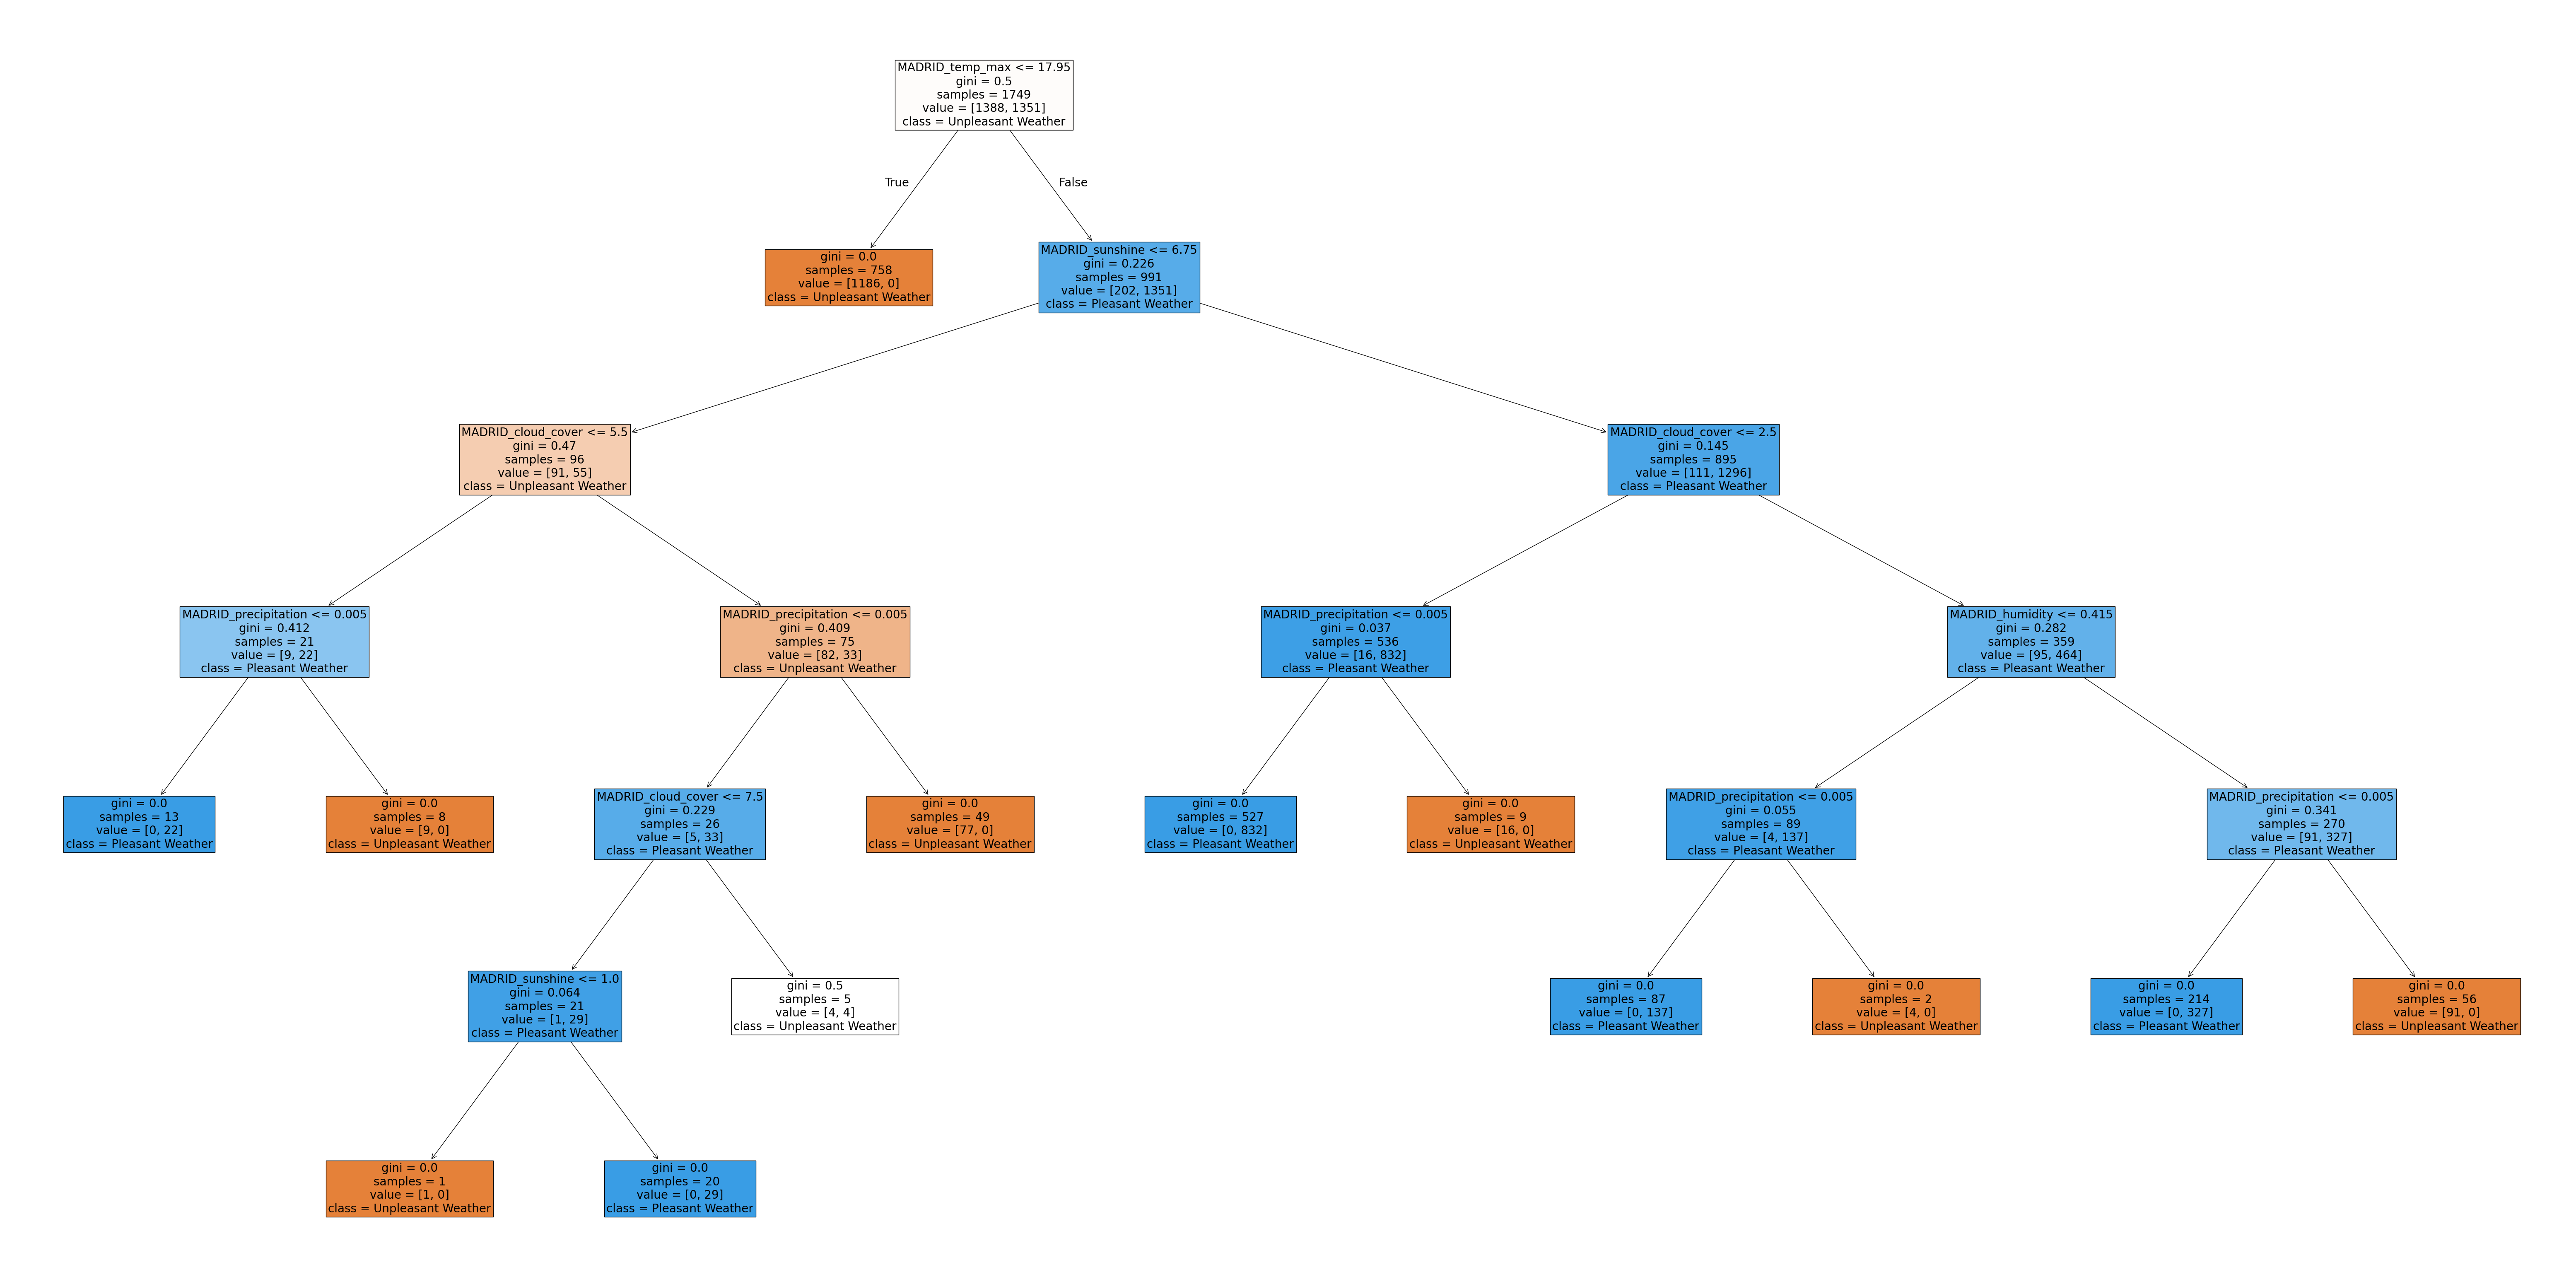

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(80, 40))
plot_tree(clf3.estimators_[6], 
          fontsize=20, 
          feature_names=df_MADRID.columns, 
          class_names=['Unpleasant Weather', 'Pleasant Weather'], 
          filled=True)

plt.show()  # Make sure to include this to render the plot


In [79]:
fig.savefig(os.path.join(path, 'optimized_random_forest_MADRID.png'),bbox_inches='tight')

##  Uncovering Feature Importances

In [80]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.00763596, 0.00097699, 0.00083904, 0.02298494, 0.227547  ,
       0.02924113, 0.21325273, 0.00617087, 0.49135134])

In [83]:
# Create a list of weather features

wx_list = [feature.replace('MADRID_', '') for feature in MADRID_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [84]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.007636
humidity            0.000977
pressure            0.000839
global_radiation    0.022985
precipitation       0.227547
sunshine            0.029241
temp_mean           0.213253
temp_min            0.006171
temp_max            0.491351
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


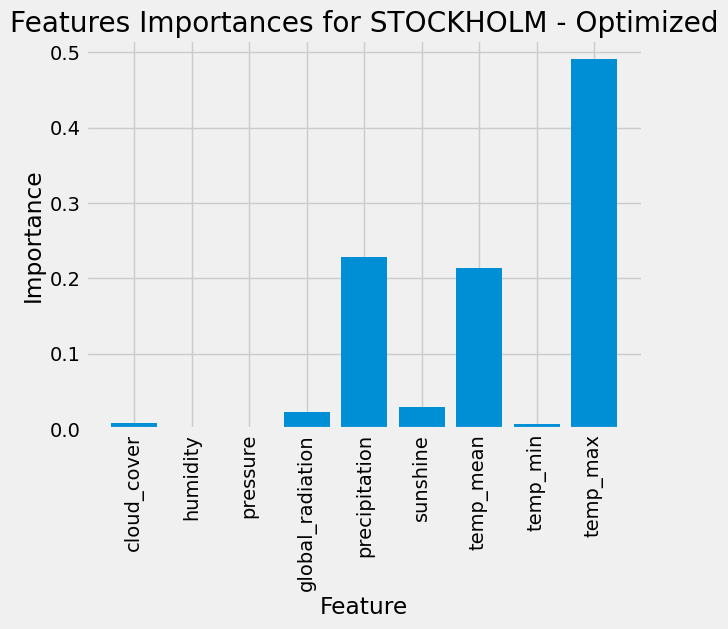

In [85]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for STOCKHOLM - Optimized');

plt.savefig(os.path.join(path,'STOCKHOLM_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()

## Optimizing Hyperparameters - Random Forest 2010s

### Data Wrangling
- Reduce data to the 2010s (2010-2019).

In [86]:
# Load the CSV file with the correct column names
climate = pd.read_csv(os.path.join(path, 'Dataset_weather.csv'), header=0, index_col= False)

# Display the first few rows to confirm
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   
1                 0             1.1              6.1             3.3   
2                 0             0.0              8.5             5.1   
3                 0             4.1              6.3             3.8   
4                 0             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   
1                   8           

In [87]:
climate.shape

(22950, 170)

In [88]:
# Reduce  dataset to climate 2010's

climate_decade = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate_decade

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
18263  20100101      1                  8               2.3            0.93   
18264  20100102      1                  3               3.0            0.74   
18265  20100103      1                  3               1.7            0.75   
18266  20100104      1                  5               1.0            0.83   
18267  20100105      1                  7               1.4            0.78   
...         ...    ...                ...               ...             ...   
21910  20191227     12                  8               1.5            0.92   
21911  20191228     12                  7               1.9            0.86   
21912  20191229     12                  6               1.1            0.93   
21913  20191230     12                  1               1.8            0.81   
21914  20191231     12                  5               2.9            0.87   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18263          0.9965                    0.18                 0.56   
18264          1.0193                    0.58                 0.00   
18265          1.0226                    0.61                 0.00   
18266          1.0169                    0.48                 0.00   
18267          1.0073                    0.53                 0.04   
...               ...                     ...                  ...   
21910          1.0273                    0.15                 0.52   
21911          1.0380                    0.35                 0.00   
21912          1.0387                    0.61                 0.00   
21913          1.0354                    0.64                 0.00   
21914          1.0350                    0.58                 0.00   

       BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
18263                 0             0.0              2.9            -0.2   
18264                 1             5.2             -1.5            -4.2   
18265                 0             6.3             -3.2            -6.0   
18266                 0             3.7             -4.9            -8.3   
18267                 0             4.4             -4.0            -7.1   
...                 ...             ...              ...             ...   
21910                 0             0.1              6.8             5.6   
21911                 0             1.3              3.7            -0.6   
21912                 0             4.9             -0.8            -2.7   
21913                 0             6.5              0.5            -3.0   
21914                 0             3.5              0.4            -1.3   

       BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  \
18263             4.8                     6               0.85   
18264             0.4                     8               0.92   
18265             1.1                     7               0.82   
18266            -3.1                     2               0.72   
18267            -1.5                     6               0.81   
...               ...                   ...                ...   
21910             7.9                     5               0.68   
21911             5.7                     8               0.68   
21912             2.6                     8               0.68   
21913             5.1                     6               0.68   
21914             3.5                     2               0.68   

       BELGRADE_pressure  BELGRADE_global_radiation  BELGRADE_precipitation  \
18263             0.9912                       0.64                    2.63   
18264             0.9995                       0.25                    0.74   
18265             1.0156                       0.25                    0.12   
18266             1.0211                       0.86                    0.00   
18267             1.0111                       0.39                    1.20   
...                  ...                 

In [89]:
# Reduce weather dataset to 2010's

weather_decade = weather[(weather['DATE'].astype(str).str[:4] >= '2010') & (weather['DATE'].astype(str).str[:4] <= '2019')]
weather_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [90]:
# Drop columns that end with wind_speed and snow_depth from the dataset

columns_to_drop = climate_decade.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'GDANSK_snow_depth',
       'HEATHROW_snow_depth', 'KASSEL_wind_speed', 'LJUBLJANA_wind_speed',
       'MAASTRICHT_wind_speed', 'MADRID_wind_speed', 'MUNCHENB_snow_depth',
       'OSLO_wind_speed', 'OSLO_snow_depth', 'ROMA_wind_speed',
       'SONNBLICK_wind_speed', 'TOURS_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [91]:
climate_decade = climate_decade.drop(columns=columns_to_drop)

In [92]:
# Drop unnecessary columns

climate_decade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [93]:
climate_decade.shape 

(3652, 150)

In [94]:
weather_decade.drop(columns = 'DATE', inplace = True)

In [95]:
weather_decade.shape

(3652, 15)

###  Reshaping for Modeling

In [96]:
X = climate_decade

In [97]:
y = weather_decade

In [98]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [99]:
X.shape

(3652, 150)

In [100]:
y.shape

(3652, 15)

### Data Split 

In [101]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [102]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 150) (2739, 15)
(913, 150) (913, 15)


### Hyperparameter Optimization

#### Grid Search

In [103]:
# Create a RF classifier

clf = RandomForestClassifier()

In [104]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [105]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 1.9308353741963704 minutes


In [106]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.6363636363636364


#### Random Search

In [107]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [108]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [109]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 6.433552503585815 minutes


In [110]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 112, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 260}
Best RANDOM search score is: 0.6367287331142752


In [111]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.6363636363636364
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 112, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 260}
Best RANDOM search score is: 0.6367287331142752


In [112]:
#### The Random Search gave a better accuracy score, so let's use those hyperparameters to optimize the random forest.

### 6. Running Random Forest with Optimized Search Parameters

In [113]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=50, max_features=73, min_samples_leaf=1, min_samples_split=8)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=73, min_samples_split=8,
                       n_estimators=200)

In [114]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6593647316538883


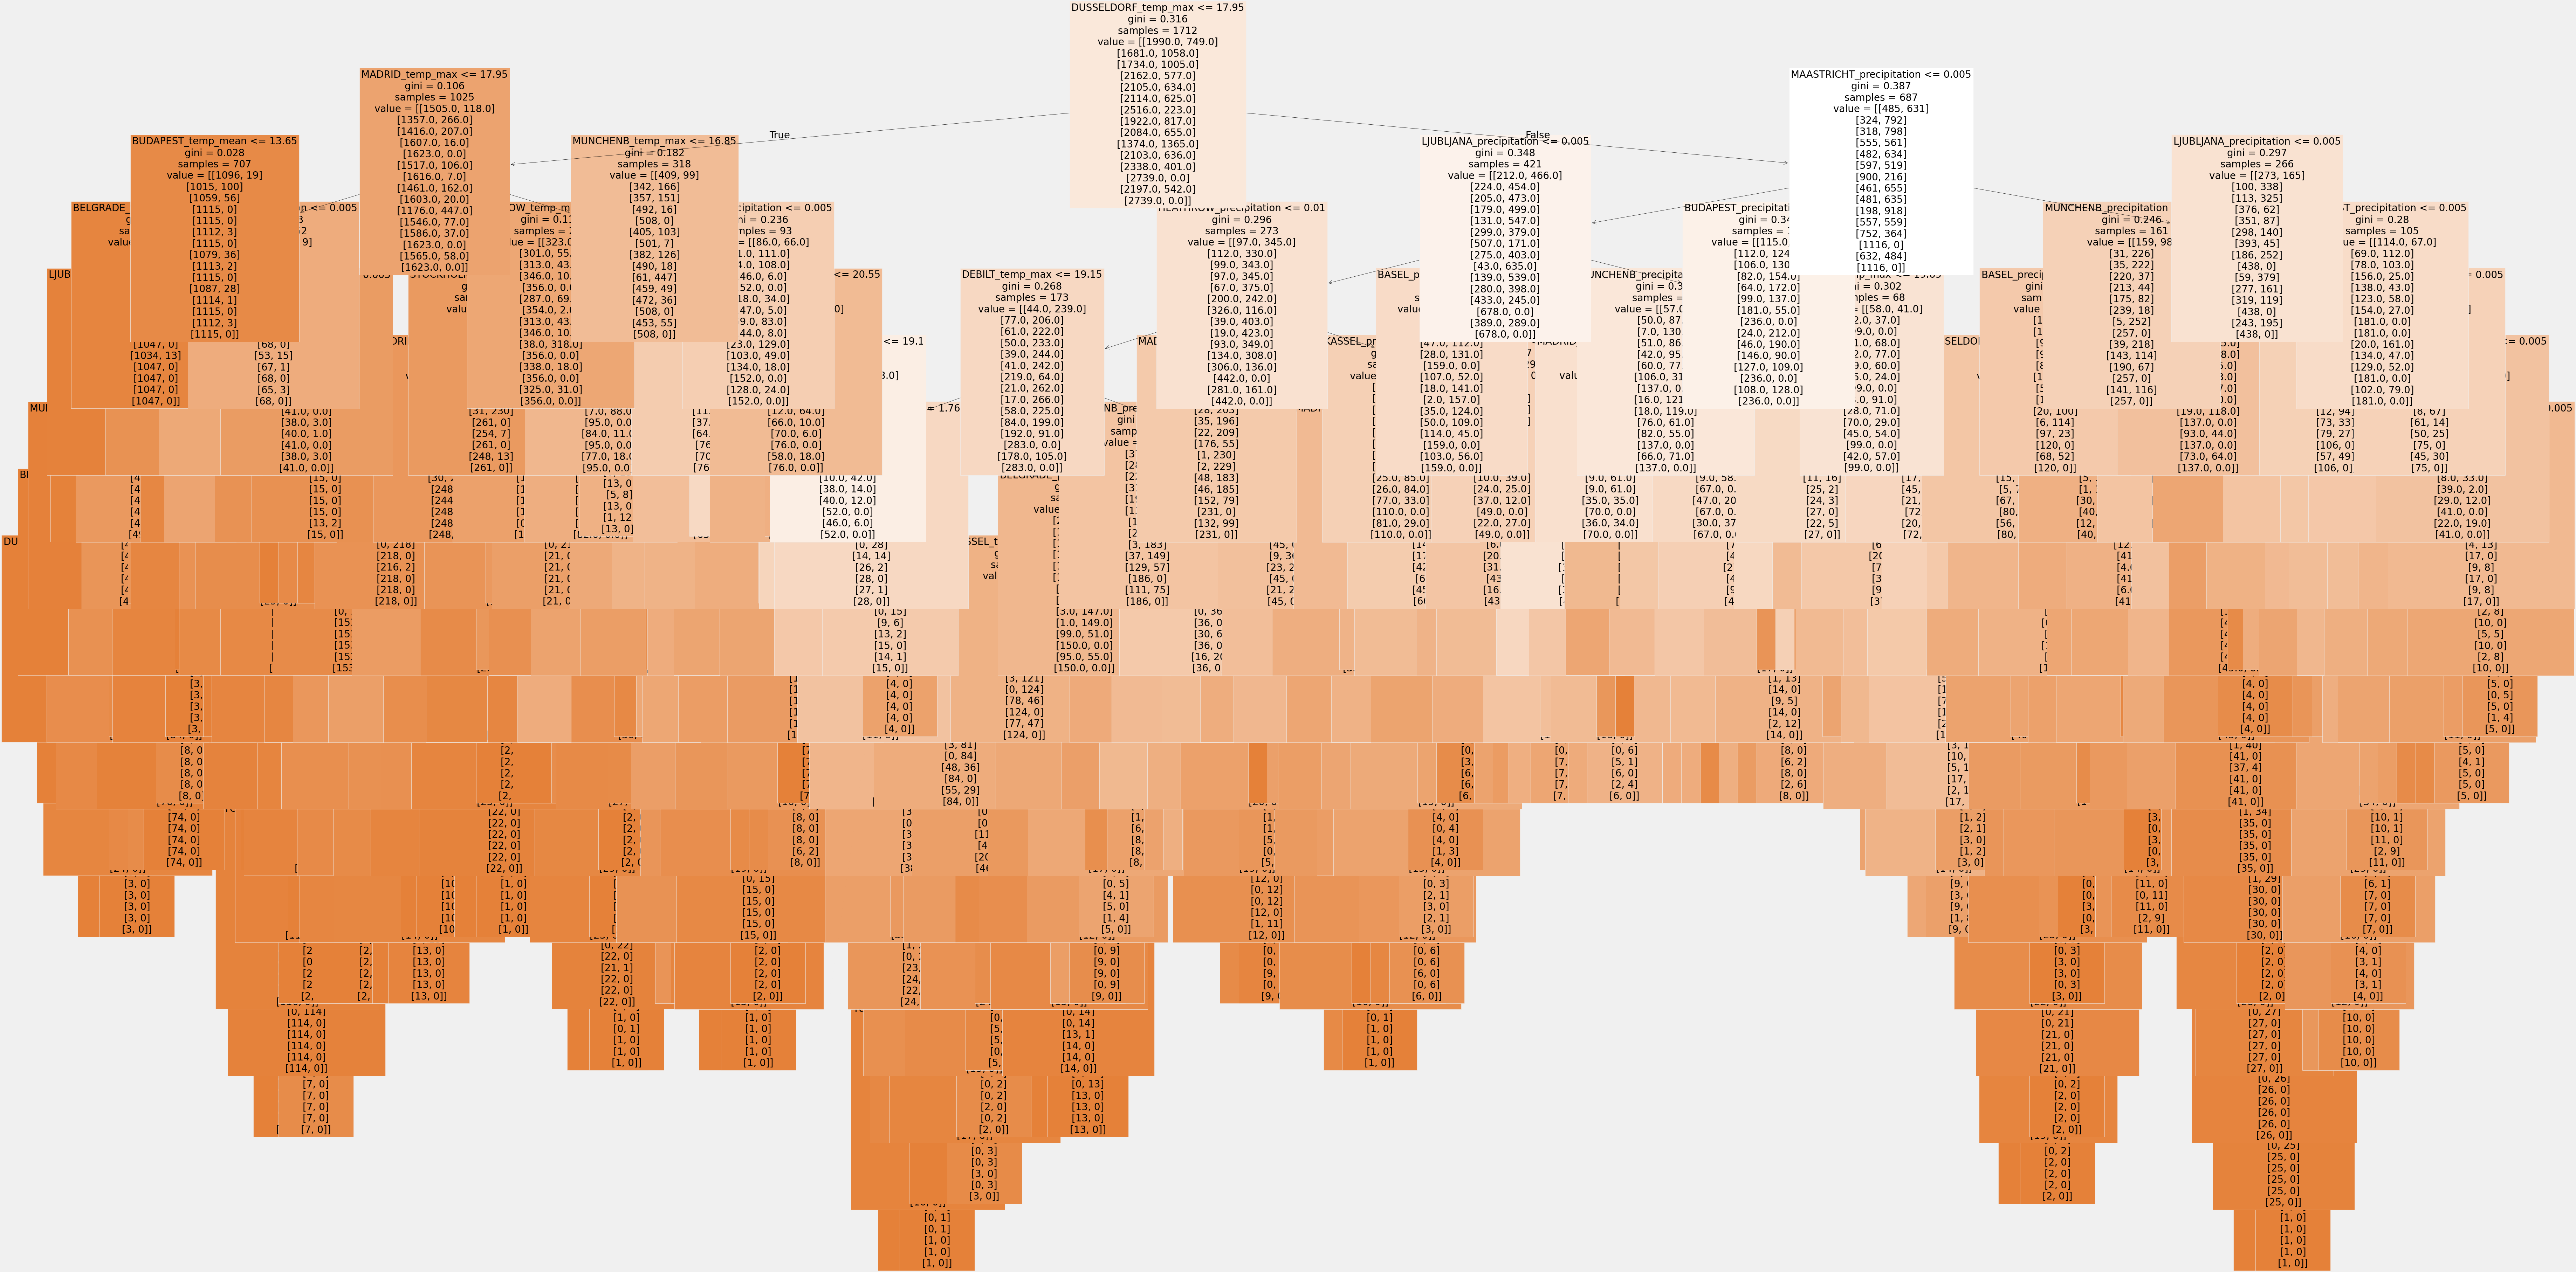

In [115]:
fig = plt.figure(figsize=(80, 40))
plot_tree(clf3.estimators_[15], 
          fontsize=20, 
          feature_names=climate_decade.columns, 
          class_names=['unpleasant', 'pleasant'], 
          filled=True)

plt.show()  # This explicitly renders the plot

In [116]:
fig.savefig(os.path.join(path, 'optimized_random_forest_2010s.png'),bbox_inches='tight')

### Uncovering Feature Importances

In [117]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(150,)


array([6.27776103e-04, 1.29174098e-03, 9.61117153e-04, 1.16881575e-03,
       3.49493877e-02, 2.58126770e-03, 4.82645442e-03, 7.66975971e-04,
       1.01130622e-01, 2.01049271e-03, 1.23596782e-03, 1.24792107e-03,
       8.74753597e-04, 3.20447224e-02, 1.12328327e-03, 2.80900915e-03,
       8.20364217e-04, 8.01911498e-03, 1.40728888e-04, 0.00000000e+00,
       0.00000000e+00, 4.39742633e-04, 2.97100432e-02, 4.01045420e-04,
       6.62382563e-03, 1.08347516e-03, 2.21951691e-02, 5.91683123e-04,
       8.11061392e-04, 1.18552812e-03, 1.27742447e-03, 2.13352120e-02,
       1.37153165e-03, 1.18497433e-03, 9.21817635e-04, 2.84130411e-02,
       4.97184990e-04, 9.53570689e-04, 7.53270205e-04, 1.00730546e-03,
       3.94952271e-02, 1.22137673e-03, 8.00146644e-03, 8.22780627e-04,
       1.65398827e-01, 4.91294845e-04, 6.48559992e-04, 2.57417600e-04,
       1.10258830e-03, 7.88146094e-04, 1.30731829e-03, 9.77547026e-04,
       2.06331062e-03, 9.10676392e-04, 2.06590183e-03, 1.51954447e-02,
      

In [118]:
# Reshape newarray

newarray = newarray.reshape(-1,15,10)
print(newarray.shape)
newarray

(1, 15, 10)


array([[[6.27776103e-04, 1.29174098e-03, 9.61117153e-04, 1.16881575e-03,
         3.49493877e-02, 2.58126770e-03, 4.82645442e-03, 7.66975971e-04,
         1.01130622e-01, 2.01049271e-03],
        [1.23596782e-03, 1.24792107e-03, 8.74753597e-04, 3.20447224e-02,
         1.12328327e-03, 2.80900915e-03, 8.20364217e-04, 8.01911498e-03,
         1.40728888e-04, 0.00000000e+00],
        [0.00000000e+00, 4.39742633e-04, 2.97100432e-02, 4.01045420e-04,
         6.62382563e-03, 1.08347516e-03, 2.21951691e-02, 5.91683123e-04,
         8.11061392e-04, 1.18552812e-03],
        [1.27742447e-03, 2.13352120e-02, 1.37153165e-03, 1.18497433e-03,
         9.21817635e-04, 2.84130411e-02, 4.97184990e-04, 9.53570689e-04,
         7.53270205e-04, 1.00730546e-03],
        [3.94952271e-02, 1.22137673e-03, 8.00146644e-03, 8.22780627e-04,
         1.65398827e-01, 4.91294845e-04, 6.48559992e-04, 2.57417600e-04,
         1.10258830e-03, 7.88146094e-04],
        [1.30731829e-03, 9.77547026e-04, 2.06331062e-03, 9.1

In [119]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.15031465, 0.04831587, 0.06304157, 0.05771533, 0.21822768,
       0.03652304, 0.02516464, 0.0656776 , 0.12131098, 0.10627817,
       0.04943477, 0.01368402, 0.01977488, 0.02131889, 0.00321791])

In [120]:
# Extract stations list

stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

In [121]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [122]:
unique_stations_list = list(set(unique_stations))  # Convert set to list

In [123]:
# Convert the set of unique stations to a list

unique_stations_list = unique_stations_list[:len(sumarray)]

In [124]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [125]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

KASSEL        0.218228
TOURS         0.150315
BELGRADE      0.121311
MAASTRICHT    0.106278
GDANSK        0.065678
STOCKHOLM     0.063042
MADRID        0.057715
VALENTIA      0.049435
LJUBLJANA     0.048316
DEBILT        0.036523
HEATHROW      0.025165
ROMA          0.021319
DUSSELDORF    0.019775
MUNCHENB      0.013684
OSLO          0.003218
dtype: float64

In [126]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['TOURS', 'LJUBLJANA', 'STOCKHOLM', 'MADRID', 'KASSEL', 'DEBILT', 'HEATHROW', 'GDANSK', 'BELGRADE', 'MAASTRICHT', 'VALENTIA', 'MUNCHENB', 'DUSSELDORF', 'ROMA', 'OSLO']


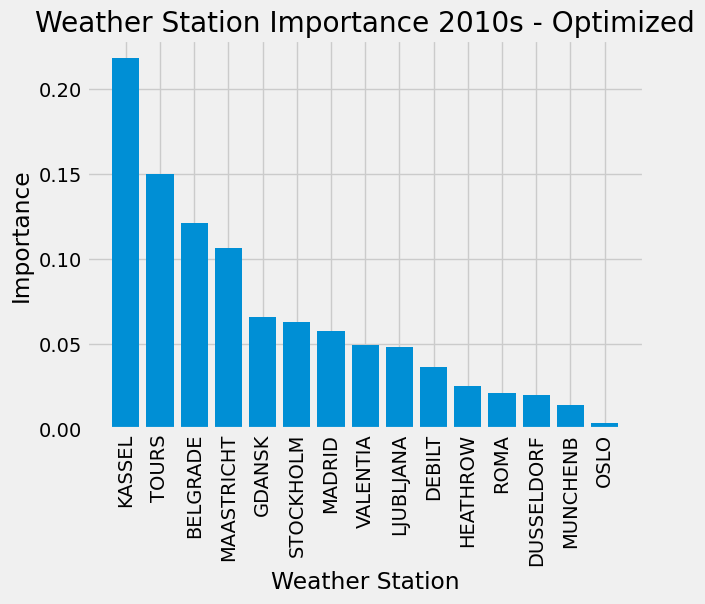

In [127]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path,'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()